In [1]:
#def get_obs_id_from_h5dl1_file(h5dl1InName):
#"/dl1/event/telescope/parameters/tel_001"
#col name is obs_id
#print(h5file)
#print(table)
#print(table[:]['energy'])
#print("for node in h5file")
#for node in h5file:
#print(node)
#h5file = open_file(h5dl1InName, "a")
#table = h5file.root.dl1.event.telescope.parameters.tel_001
#obs_id=int(np.mean(table[:]['obs_id']))
#obs_id_std=np.std(table[:]['obs_id'])
#print(obs_id)
#print(np.std(table[:]['obs_id']))
#h5file.close()
#if (obs_id_std == 0.0) :
#return obs_id
#return -999
#
import pandas as pd
import numpy as np
import glob
import gc
import matplotlib.pyplot as plt
from matplotlib import colors
from astropy.coordinates import SkyCoord, AltAz, angular_separation
import astropy.units as u
from scipy.stats import binned_statistic
from scipy.signal import lombscargle
import h5py
from astropy.io import fits
from astropy.table import Table
from tables import open_file

from astropy.table import join, vstack
from ctapipe.io import read_table 

from ctapipe.instrument import SubarrayDescription
from matplotlib.colors import LogNorm


import math

In [2]:
math.atan2(0.0,0.0)*180.0/np.pi

0.0

In [3]:
# Function to calculate phi
def get_phi_from_mpi_to_pi_true(row):
    return math.atan2(row['true_core_x'],row['true_core_y'])

In [4]:
# Function to calculate phi
def get_phi_from_mpi_to_pi_reco(row):
    return math.atan2(row['muonefficiency_impact_x'],row['muonefficiency_impact_y'])

In [5]:
# Function to calculate phi
def get_phi_from_mpi_to_pi_reco_rot(row):
    return math.atan2(row['muonefficiency_impact_x_rot'],row['muonefficiency_impact_y_rot'])

In [6]:
#file_list = [f"data_not_fixed_chord_length/dl1_muon_ctapipe_run00{i}.h5" for i in np.arange(0,10)]
file_list = [f"data_fixed_chord_length/dl1_muon_ctapipe_run00{i}.h5" for i in np.arange(0,10)]
#file_list = [f"data_fixed_chord_length_fixed_hole_radius/dl1_muon_ctapipe_run00{i}.h5" for i in np.arange(0,10)]
#file_list = [f"data_camera_shadowing_avet/dl1_muon_ctapipe_run00{i}.h5" for i in np.arange(0,10)]
#file_list = [f"data_camera_shadowing/dl1_muon_ctapipe_run00{i}.h5" for i in np.arange(0,10)]
#file_list

In [7]:
#csv_name_df_delta_x_hist="data_not_fixed_chord_length_x_resolution.csv"
#csv_name_df_delta_y_hist="data_not_fixed_chord_length_y_resolution.csv"
csv_name_df_delta_x_hist="data_fixed_chord_length_x_resolution.csv"
csv_name_df_delta_y_hist="data_fixed_chord_length_y_resolution.csv"
#csv_name_df_delta_x_hist="data_fixed_chord_length_fixed_hole_radius_x_resolution.csv"
#csv_name_df_delta_y_hist="data_fixed_chord_length_fixed_hole_radius_y_resolution.csv"
#csv_name_df_delta_x_hist="data_camera_shadowing_x_resolution.csv"
#csv_name_df_delta_y_hist="data_camera_shadowing_y_resolution.csv"

In [8]:
df_data_fixed_chord_length_fixed_hole_radius_x_resolution = pd.read_csv("data_fixed_chord_length_fixed_hole_radius_x_resolution.csv")
df_data_fixed_chord_length_fixed_hole_radius_y_resolution = pd.read_csv("data_fixed_chord_length_fixed_hole_radius_y_resolution.csv")

In [9]:
h5file_list = [open_file(filen, "a") for filen in file_list]
#h5file_list[0]

In [10]:
df_table_true_info_list = [pd.DataFrame(h5file_list[i].root.simulation.event.subarray.shower[:]) for i in np.arange(0,10)]
#df_table_true_info_list[0]

In [11]:
df_table_reco_mu_list = [pd.DataFrame(h5file_list[i].root.dl1.event.telescope.muon.tel_001[:]) for i in np.arange(0,10)]
#df_table_reco_mu_list[0]

In [12]:
df_table_true_info = pd.concat(df_table_true_info_list, ignore_index=True)

In [13]:
df_table_reco_mu = pd.concat(df_table_reco_mu_list, ignore_index=True)

In [14]:
df_table_reco_mu = df_table_reco_mu.rename(columns={"obs_id": "obs_id_reco"})

In [15]:
df_table_reco_mu = df_table_reco_mu.rename(columns={"event_id": "event_id_reco"})

In [16]:
print(len(df_table_true_info))
print(len(df_table_reco_mu))

99868
99868


In [17]:
print(df_table_true_info.keys())
print(df_table_reco_mu.keys())

Index(['obs_id', 'event_id', 'true_energy', 'true_alt', 'true_az',
       'true_core_x', 'true_core_y', 'true_h_first_int', 'true_x_max',
       'true_starting_grammage', 'true_shower_primary_id'],
      dtype='object')
Index(['obs_id_reco', 'event_id_reco', 'tel_id', 'muonring_center_fov_lon',
       'muonring_center_fov_lat', 'muonring_radius',
       'muonring_center_fov_lon_err', 'muonring_center_fov_lat_err',
       'muonring_radius_err', 'muonring_center_phi',
       'muonring_center_distance', 'muonparameters_containment',
       'muonparameters_completeness', 'muonparameters_intensity_ratio',
       'muonparameters_mean_squared_error', 'muonparameters_ring_intensity',
       'muonparameters_intensity_outside_ring',
       'muonparameters_n_pixels_in_ring',
       'muonparameters_mean_intensity_outside_ring',
       'muonparameters_radial_std_dev', 'muonparameters_skewness',
       'muonparameters_excess_kurtosis', 'muonefficiency_width',
       'muonefficiency_impact', 'muoneff

In [18]:
df = pd.concat([df_table_true_info, df_table_reco_mu], axis=1).reset_index(drop=True)

In [19]:
print("obs_id mean   ",np.mean(df['obs_id'].values - df['obs_id_reco'].values))
print("obs_id std    ",np.std(df['obs_id'].values - df['obs_id_reco'].values))
print("event_id mean ",np.mean(df['event_id'].values - df['event_id_reco'].values))
print("event_id std  ",np.std(df['event_id'].values - df['event_id_reco'].values))

obs_id mean    0.0
obs_id std     0.0
event_id mean  0.0
event_id std   0.0


In [20]:
print(np.isnan(df['muonring_radius'].values).sum())
print(np.isnan(df['muonring_center_fov_lat'].values).sum())
print(np.isnan(df['muonring_center_distance'].values).sum())
print(np.isnan(df['muonefficiency_impact_x'].values).sum())
print(np.isnan(df['muonparameters_ring_intensity'].values).sum())

16030
16030
16030
16031
16030


In [21]:
df['true_core_r'] = np.sqrt(df['true_core_x'].values*df['true_core_x'].values + df['true_core_y'].values*df['true_core_y'].values)

In [22]:
df['true_core_phi']=df.apply(get_phi_from_mpi_to_pi_true,axis=1)

In [23]:
df['muonefficiency_impact_r'] = np.sqrt(df['muonefficiency_impact_x'].values*df['muonefficiency_impact_x'].values + df['muonefficiency_impact_y'].values*df['muonefficiency_impact_y'].values)

In [24]:
df['muonefficiency_impact_dx'] = df['muonefficiency_impact_x'].values - df['true_core_x'].values

In [25]:
df['muonefficiency_impact_dy'] = df['muonefficiency_impact_y'].values - df['true_core_y'].values

In [26]:
df['muonefficiency_impact_delta'] = np.sqrt(df['muonefficiency_impact_dx'].values*df['muonefficiency_impact_dx'].values + df['muonefficiency_impact_dy'].values*df['muonefficiency_impact_dy'].values)

In [27]:
df['muonefficiency_impact_phi']=df.apply(get_phi_from_mpi_to_pi_reco,axis=1)

In [28]:
alpha_rot = np.deg2rad(-90)
df['muonefficiency_impact_x_rot'] = df['muonefficiency_impact_x'].values*np.cos(alpha_rot) - df['muonefficiency_impact_y'].values*np.sin(alpha_rot)
df['muonefficiency_impact_y_rot'] = df['muonefficiency_impact_x'].values*np.sin(alpha_rot) + df['muonefficiency_impact_y'].values*np.cos(alpha_rot)

In [29]:
df['muonefficiency_impact_dx_rot'] = df['muonefficiency_impact_x_rot'].values - df['true_core_x'].values

In [30]:
df['muonefficiency_impact_dy_rot'] = df['muonefficiency_impact_y_rot'].values - df['true_core_y'].values

In [31]:
df['muonefficiency_impact_delta_rot'] = np.sqrt(df['muonefficiency_impact_dx_rot'].values*df['muonefficiency_impact_dx_rot'].values + df['muonefficiency_impact_dy_rot'].values*df['muonefficiency_impact_dy_rot'].values)

In [32]:
df['muonefficiency_impact_phi_rot']=df.apply(get_phi_from_mpi_to_pi_reco_rot,axis=1)

In [33]:
dfnna=df.dropna()

<Axes: >

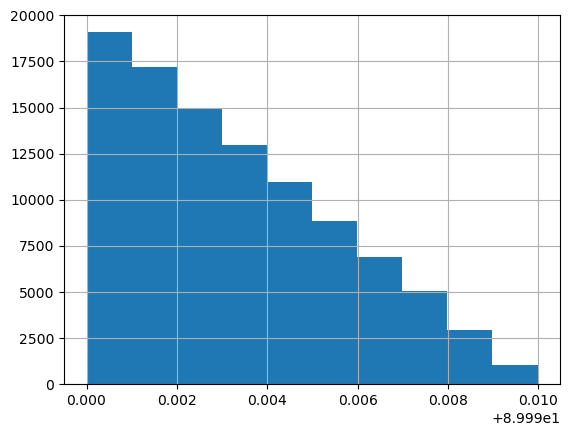

In [34]:
df['true_alt'].hist()

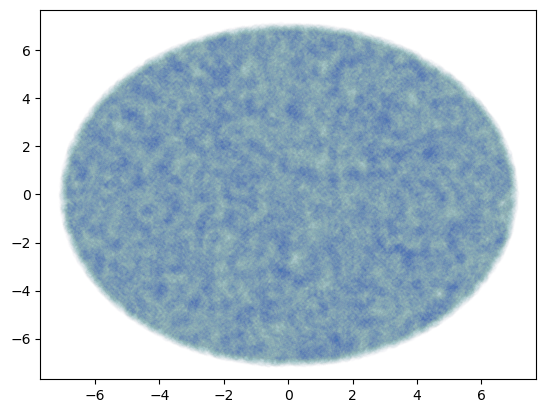

In [35]:
plt.scatter(df['true_core_x'].values,
            df['true_core_y'].values,
            alpha=0.008)
#plt.xlabel('X axis')
#plt.ylabel('Y axis')
#plt.ylim(1,8)
#plt.title('Scatter Plot Example')
plt.show()

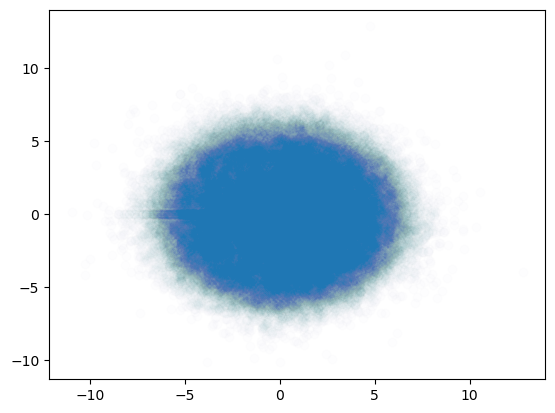

In [36]:
plt.scatter(df['muonefficiency_impact_x'].values,
            df['muonefficiency_impact_y'].values,
            alpha=0.008)
#plt.xlabel('X axis')
#plt.ylabel('Y axis')
#plt.ylim(1,8)
#plt.title('Scatter Plot Example')
plt.show()

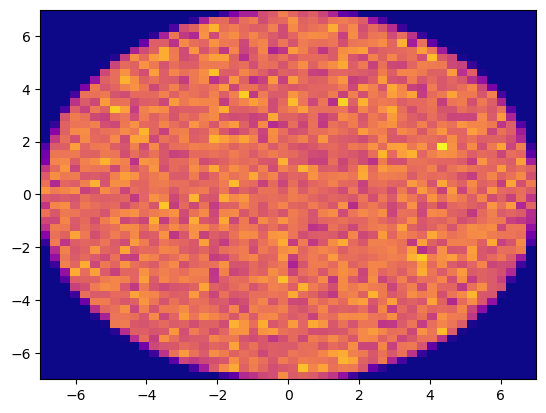

In [37]:
plt.hist2d(df['true_core_x'].values,
           df['true_core_y'].values,           
           bins=50,
           cmap='plasma')
#plt.xlabel('X axis')
#plt.ylabel('Y axis')
#plt.ylim(1,8)
#plt.title('Scatter Plot Example')
plt.show()

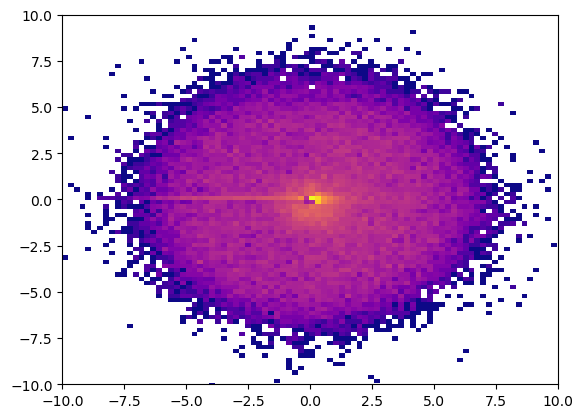

In [38]:
plt.hist2d(dfnna['muonefficiency_impact_x'].values,
           dfnna['muonefficiency_impact_y'].values,           
           bins=100,
           cmap='plasma',
           norm=LogNorm())
#plt.xlabel('X axis')
#plt.ylabel('Y axis')
plt.xlim(-10,10)
plt.ylim(-10,10)
#plt.title('Scatter Plot Example')
plt.show()

<Axes: >

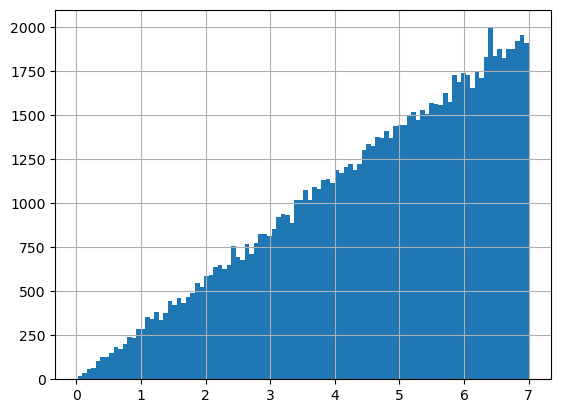

In [39]:
df['true_core_r'].hist(bins=100)

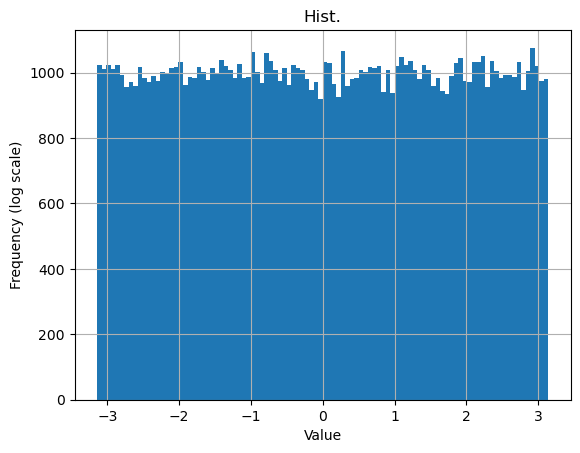

In [40]:
df['true_core_phi'].hist(bins=100)

#plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')

#plt.xlim(0.0,10)
#plt.ylim(0.0,300)

plt.show()

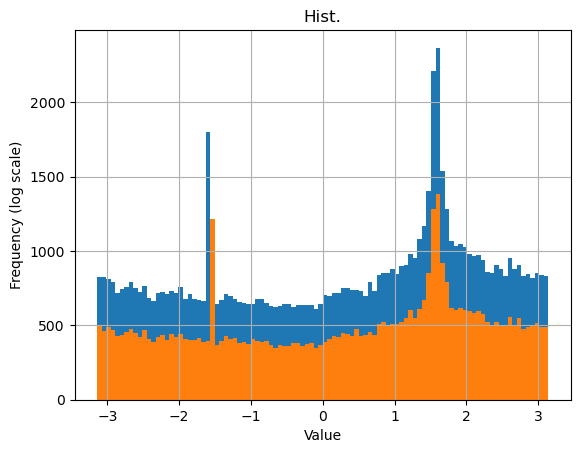

In [41]:
df['muonefficiency_impact_phi'].hist(bins=100)
dfnna['muonefficiency_impact_phi'].hist(bins=100)

#plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')

#plt.xlim(0.0,10)
#plt.ylim(0.0,300)

plt.show()

(array([ 505.,  465.,  486.,  467.,  426.,  432.,  453.,  474.,  447.,
         424.,  467.,  409.,  388.,  421.,  437.,  399.,  445.,  419.,
         445.,  407.,  400.,  399.,  413.,  390.,  396., 1213.,  371.,
         393.,  426.,  406.,  416.,  378.,  390.,  373.,  407.,  396.,
         387.,  397.,  371.,  348.,  369.,  360.,  362.,  382.,  383.,
         358.,  372.,  379.,  348.,  368.,  387.,  406.,  425.,  424.,
         449.,  439.,  430.,  473.,  426.,  432.,  455.,  438.,  509.,
         525.,  501.,  511.,  506.,  525.,  552.,  604.,  552.,  610.,
         671.,  853., 1281., 1382.,  919.,  792.,  618.,  606.,  618.,
         604.,  598.,  582.,  595.,  576.,  523.,  503.,  525.,  505.,
         503.,  553.,  501.,  548.,  475.,  488.,  498.,  517.,  492.,
         487.]),
 array([-1.79999367e+02, -1.76399398e+02, -1.72799429e+02, -1.69199459e+02,
        -1.65599490e+02, -1.61999521e+02, -1.58399552e+02, -1.54799583e+02,
        -1.51199614e+02, -1.47599645e+02, -1.43999

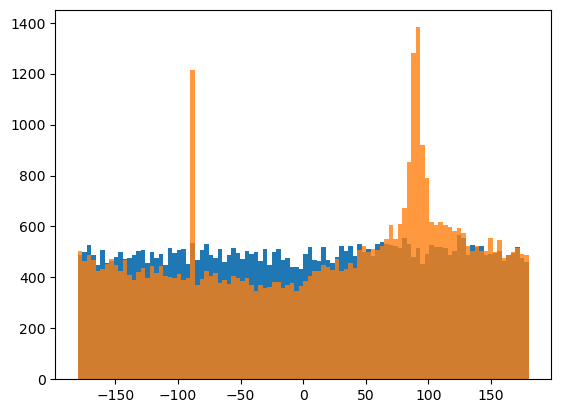

In [42]:
plt.hist(dfnna['true_core_phi'].values*180/np.pi, bins=100)
plt.hist(dfnna['muonefficiency_impact_phi'].values*180/np.pi,bins=100,alpha=0.8)


(array([488., 501., 526., 489., 448., 508., 458., 464., 481., 499., 472.,
        475., 487., 504., 509., 457., 499., 475., 490., 450., 517., 495.,
        506., 510., 451., 535., 469., 509., 531., 489., 478., 510., 461.,
        489., 515., 495., 472., 504., 491., 501., 463., 511., 448., 498.,
        510., 470., 477., 439., 439., 432., 491., 520., 467., 466., 519.,
        469., 458., 479., 523., 503., 525., 485., 531., 501., 510., 483.,
        533., 538., 530., 526., 523., 516., 553., 531., 481., 516., 454.,
        491., 527., 519., 518., 517., 489., 503., 568., 553., 487., 529.,
        520., 525., 489., 490., 497., 503., 466., 489., 494., 521., 477.,
        461.]),
 array([-1.79999350e+02, -1.76399372e+02, -1.72799395e+02, -1.69199417e+02,
        -1.65599439e+02, -1.61999462e+02, -1.58399484e+02, -1.54799506e+02,
        -1.51199529e+02, -1.47599551e+02, -1.43999574e+02, -1.40399596e+02,
        -1.36799618e+02, -1.33199641e+02, -1.29599663e+02, -1.25999685e+02,
        -1.223

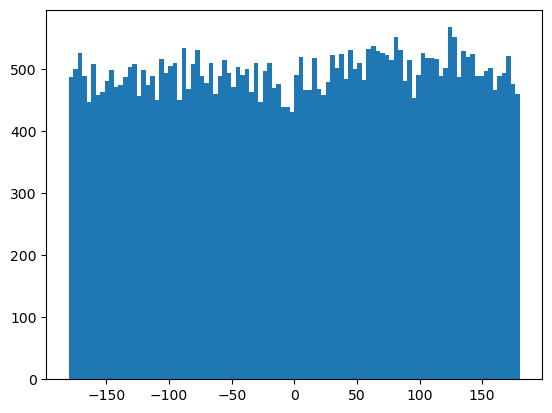

In [43]:
plt.hist(dfnna['true_core_phi'].values*180/np.pi, bins=100)

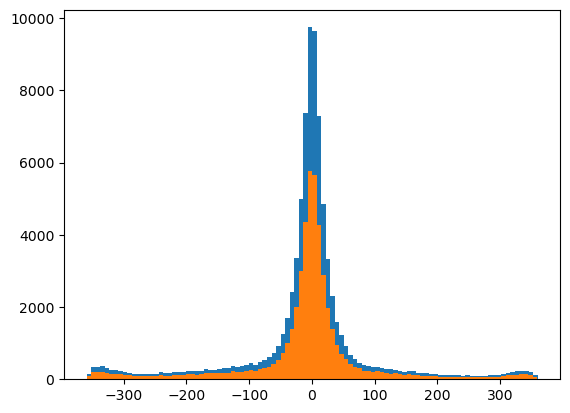

In [44]:
plt.hist(df['muonefficiency_impact_phi_rot'].values*180/np.pi - df['true_core_phi'].values*180/np.pi,
        bins=100)
plt.hist(dfnna['muonefficiency_impact_phi_rot'].values*180/np.pi - dfnna['true_core_phi'].values*180/np.pi,
        bins=100)
#plt.xlabel('X axis')
#plt.ylabel('Y axis')
#plt.ylim(1,8)
#plt.xlim(1,8)
#plt.title('Scatter Plot Example')
plt.show()

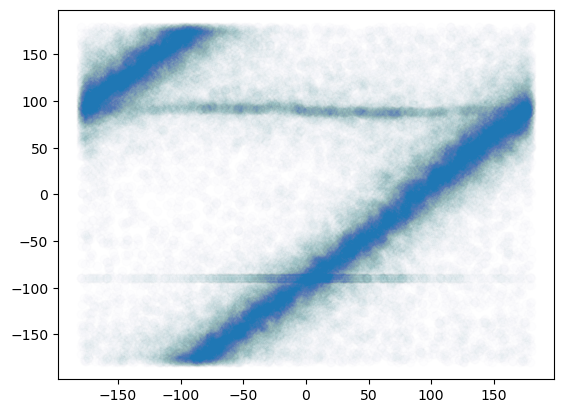

In [45]:
plt.scatter(dfnna['true_core_phi'].values*180/np.pi,
            dfnna['muonefficiency_impact_phi'].values*180/np.pi,
            alpha=0.008)
#plt.xlabel('X axis')
#plt.ylabel('Y axis')
#plt.ylim(1,8)
#plt.title('Scatter Plot Example')
plt.show()

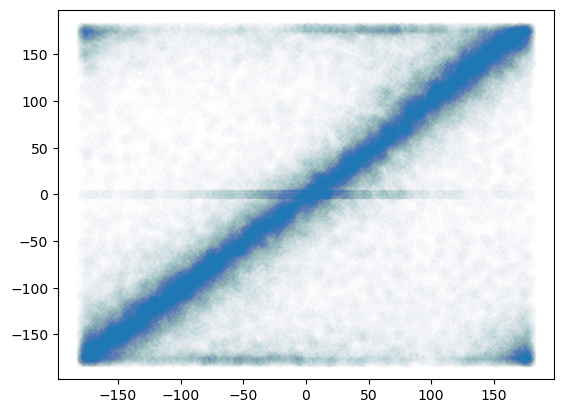

In [46]:
plt.scatter(dfnna['true_core_phi'].values*180/np.pi,
            dfnna['muonefficiency_impact_phi_rot'].values*180/np.pi,
            alpha=0.008)
#plt.xlabel('X axis')
#plt.ylabel('Y axis')
#plt.ylim(1,8)
#plt.title('Scatter Plot Example')
plt.show()

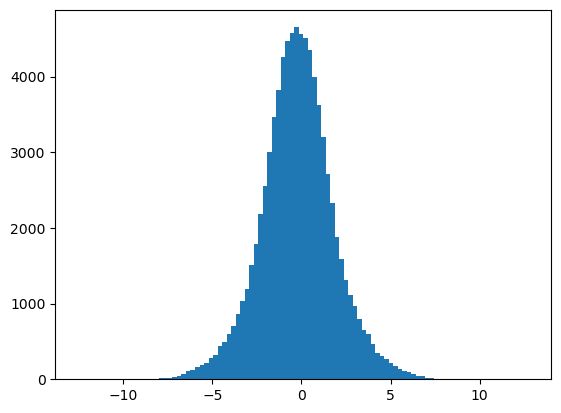

In [47]:
tmptmp02 = plt.hist(df['muonefficiency_impact_x_rot'].values - df['true_core_x'].values,bins=100)

In [48]:
np.sum(tmptmp02[0])

np.float64(83837.0)

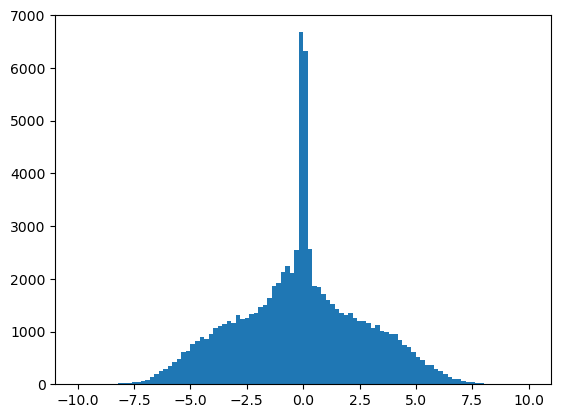

In [49]:
tmptmp02 = plt.hist(df['muonefficiency_impact_x_rot'].values,bins=np.linspace(-10.0,10.0,101))

<Axes: >

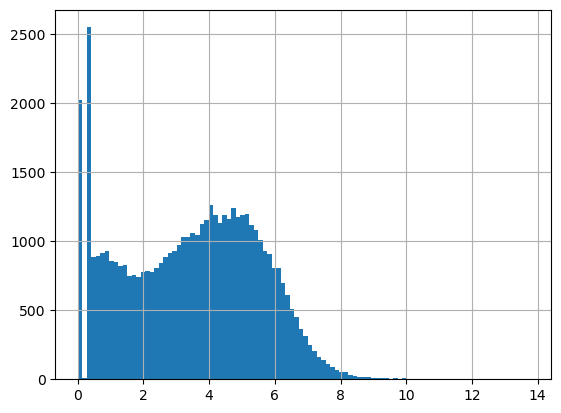

In [50]:
dfnna['muonefficiency_impact'].hist(bins=100)

<Axes: >

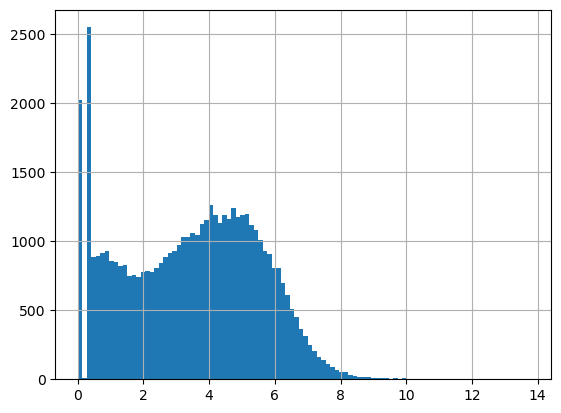

In [51]:
dfnna['muonefficiency_impact_r'].hist(bins=100)

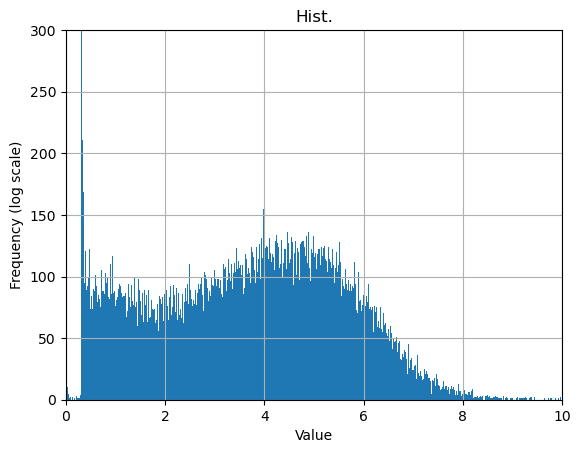

In [52]:
dfnna['muonefficiency_impact_r'].hist(bins=1000)

#plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')

plt.xlim(0.0,10)
plt.ylim(0.0,300)

plt.show()

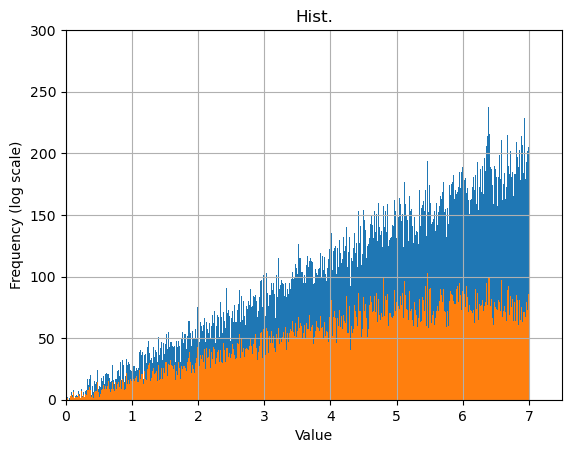

In [53]:
df['true_core_r'].hist(bins=1000)
dfnna['true_core_r'].hist(bins=1000)

#plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')

plt.xlim(0,7.5)
plt.ylim(0.0,300)

plt.show()

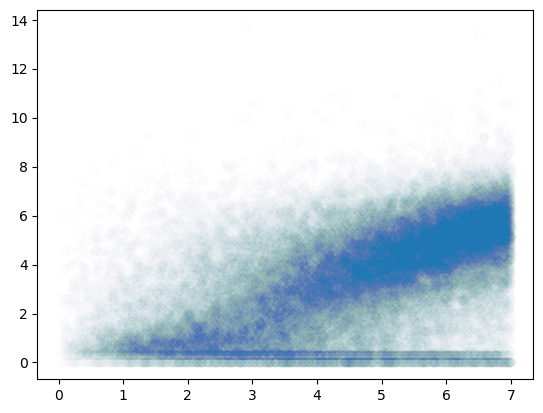

In [54]:
plt.scatter(dfnna['true_core_r'].values,
            dfnna['muonefficiency_impact_r'].values,
            alpha=0.008)
#plt.xlabel('X axis')
#plt.ylabel('Y axis')
#plt.ylim(1,8)
#plt.title('Scatter Plot Example')
plt.show()

In [55]:
dfnna_cut_tmp = dfnna[dfnna['true_core_r']>6]
dfnna_cut_tmp = dfnna_cut_tmp[dfnna_cut_tmp['true_core_r']<7]
dfnna_cut_tmp = dfnna_cut_tmp[dfnna_cut_tmp['muonefficiency_impact_r']>0.0]

In [56]:
dfnna_cut_reco = dfnna[dfnna['muonefficiency_impact_r']>6]
dfnna_cut_reco = dfnna_cut_reco[dfnna_cut_reco['muonefficiency_impact_r']<7]

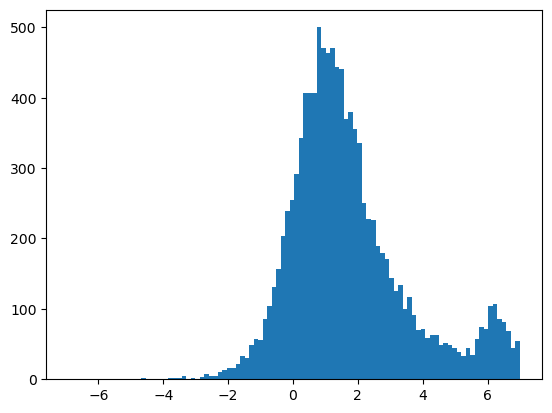

In [57]:
plt.hist(dfnna_cut_tmp['true_core_r'].values - dfnna_cut_tmp['muonefficiency_impact_r'].values,
        bins=100)
#plt.xlabel('X axis')
#plt.ylabel('Y axis')
#plt.ylim(1,8)
#plt.xlim(1,8)
#plt.title('Scatter Plot Example')
plt.show()

In [58]:
np.max(dfnna['muonefficiency_impact_r'].values - dfnna['muonefficiency_impact'].values)

np.float64(1.7763568394002505e-15)

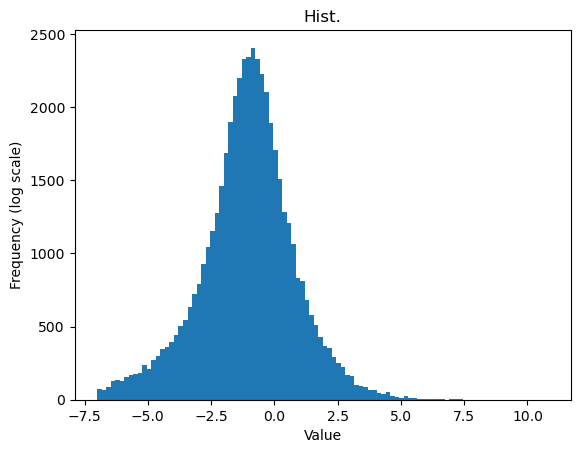

In [59]:
plt.hist(dfnna['muonefficiency_impact_r'].values - dfnna['true_core_r'].values,
         bins=100)

#plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')

#plt.xlim(-0.025,0.025)

plt.show()

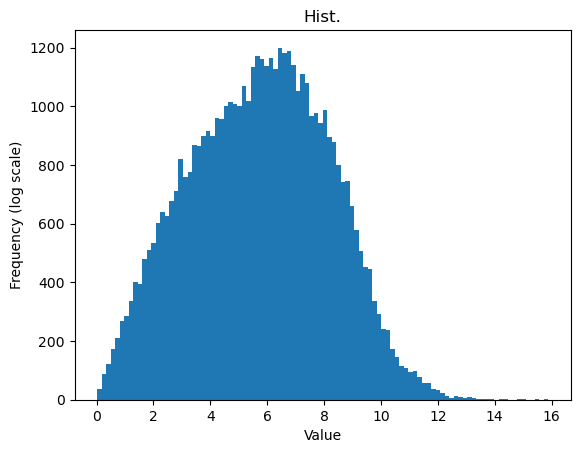

In [60]:
plt.hist(dfnna['muonefficiency_impact_delta'].values,bins=100)

#plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')

#plt.xlim(-0.025,0.025)

plt.show()

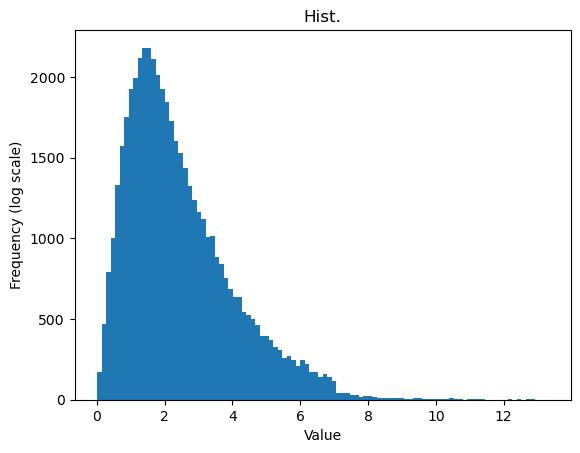

In [61]:
plt.hist(dfnna['muonefficiency_impact_delta_rot'].values,bins=100)

#plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')

#plt.xlim(-0.025,0.025)

plt.show()

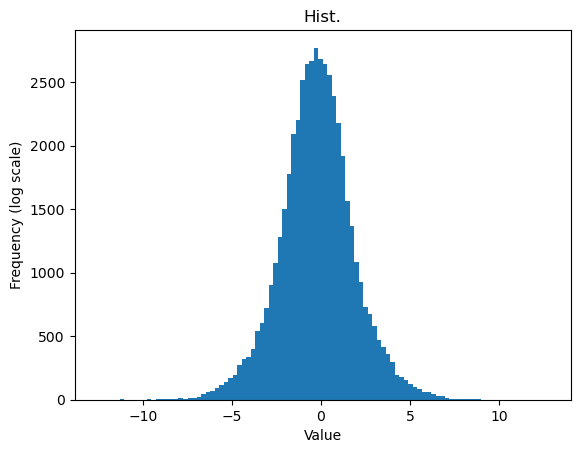

In [62]:
delta_x_hist = plt.hist(dfnna['muonefficiency_impact_x_rot'].values - dfnna['true_core_x'].values,bins=100)

#plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')

#plt.xlim(-0.025,0.025)

df_delta_x_hist = pd.DataFrame({
    'x': ((np.roll(delta_x_hist[1],1)+delta_x_hist[1])/2.0)[1:],
    'y': delta_x_hist[0],
})


plt.show()

In [63]:
df_delta_x_hist

x    y
0  -12.427503  1.0
1  -12.174435  0.0
2  -11.921366  0.0
3  -11.668298  1.0
4  -11.415230  1.0
..        ...  ...
95  11.613988  0.0
96  11.867056  1.0
97  12.120124  0.0
98  12.373193  0.0
99  12.626261  1.0

[100 rows x 2 columns]

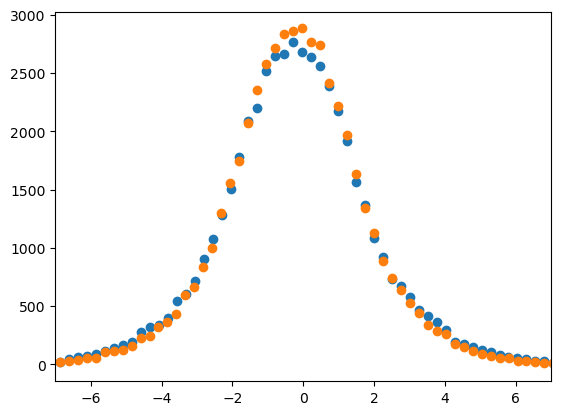

In [64]:
plt.scatter(df_delta_x_hist['x'],
            df_delta_x_hist['y'],
           alpha=1)

plt.scatter(df_data_fixed_chord_length_fixed_hole_radius_x_resolution['x'],
            df_data_fixed_chord_length_fixed_hole_radius_x_resolution['y'],
           alpha=1)

#plt.xlabel('X axis')
#plt.ylabel('Y axis')
plt.xlim(-7,7)
#plt.title('Scatter Plot Example')
plt.show()

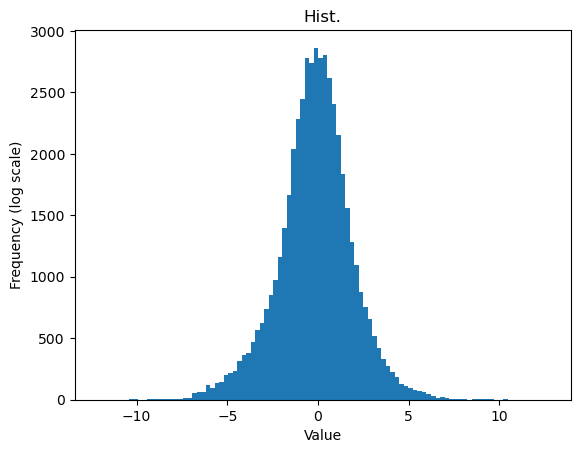

In [65]:
delta_y_hist = plt.hist(dfnna['muonefficiency_impact_y_rot'].values - dfnna['true_core_y'].values,bins=100)

#plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')


df_delta_y_hist = pd.DataFrame({
    'x': ((np.roll(delta_y_hist[1],1)+delta_y_hist[1])/2.0)[1:],
    'y': delta_y_hist[0],
})

#plt.xlim(-0.025,0.025)

plt.show()

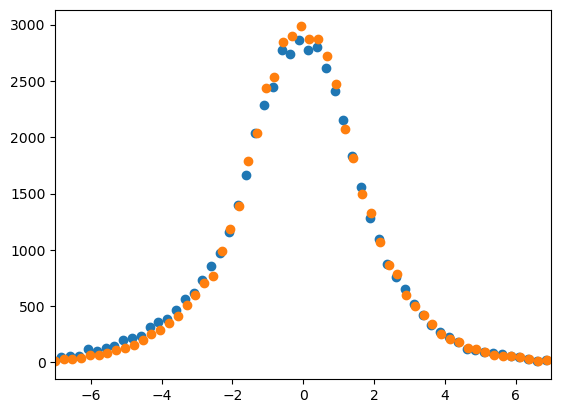

In [66]:
plt.scatter(df_delta_y_hist['x'],
            df_delta_y_hist['y'],
           alpha=1)

plt.scatter(df_data_fixed_chord_length_fixed_hole_radius_y_resolution['x'],
            df_data_fixed_chord_length_fixed_hole_radius_y_resolution['y'],
           alpha=1)

#plt.xlabel('X axis')
#plt.ylabel('Y axis')
plt.xlim(-7,7)
#plt.title('Scatter Plot Example')
plt.show()

In [67]:
df_delta_x_hist.to_csv(csv_name_df_delta_x_hist)
df_delta_y_hist.to_csv(csv_name_df_delta_y_hist)

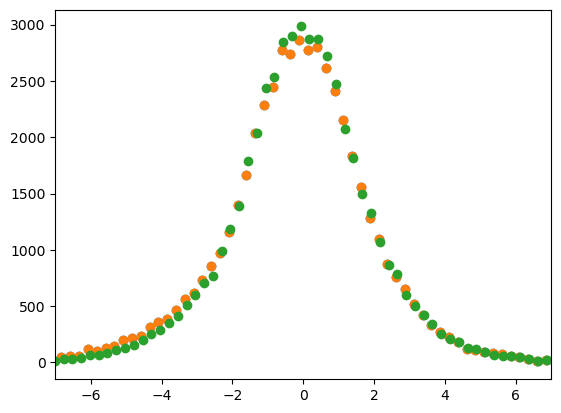

In [68]:
plt.scatter(df_delta_y_hist['x'],
            df_delta_y_hist['y'],
           alpha=1)

plt.scatter(df_delta_y_hist['x'],
            df_delta_y_hist['y'],
           alpha=1)

plt.scatter(df_data_fixed_chord_length_fixed_hole_radius_y_resolution['x'],
            df_data_fixed_chord_length_fixed_hole_radius_y_resolution['y'],
           alpha=1)

#plt.xlabel('X axis')
#plt.ylabel('Y axis')
plt.xlim(-7,7)
#plt.title('Scatter Plot Example')
plt.show()

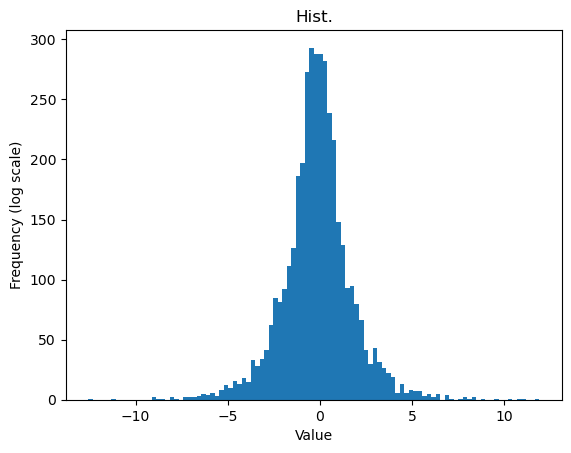

In [69]:
delta_x_hist_cut = plt.hist(dfnna_cut_reco['muonefficiency_impact_x_rot'].values - dfnna_cut_reco['true_core_x'].values,bins=100)

#plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')

#plt.xlim(-0.025,0.025)

df_delta_x_hist_cut = pd.DataFrame({
    'x': ((np.roll(delta_x_hist_cut[1],1)+delta_x_hist_cut[1])/2.0)[1:],
    'y': delta_x_hist[0],
})


plt.show()

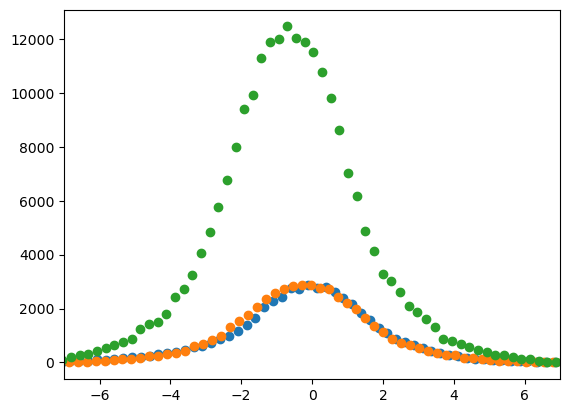

In [70]:
plt.scatter(df_delta_y_hist['x'],
            df_delta_y_hist['y'],
           alpha=1)

plt.scatter(df_data_fixed_chord_length_fixed_hole_radius_x_resolution['x'],
            df_data_fixed_chord_length_fixed_hole_radius_x_resolution['y'],
           alpha=1)

plt.scatter(df_delta_x_hist_cut['x'],
            df_delta_x_hist_cut['y']*4.5,
           alpha=1)

#plt.xlabel('X axis')
#plt.ylabel('Y axis')
plt.xlim(-7,7)
#plt.title('Scatter Plot Example')
plt.show()

In [71]:
dfnna_cut_tmp['true_core_x']

7        5.066977
35       5.753919
36      -6.716635
45      -3.709835
62      -2.603246
           ...   
99840    5.517801
99859   -6.364097
99861   -6.218310
99863    5.581694
99866    3.191757
Name: true_core_x, Length: 10980, dtype: float64

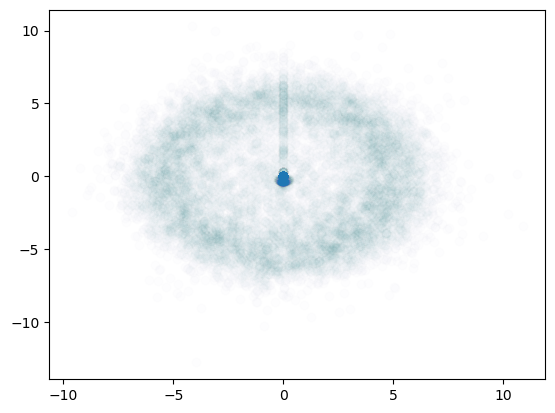

In [72]:
plt.scatter(dfnna_cut_tmp['muonefficiency_impact_x_rot'],
            dfnna_cut_tmp['muonefficiency_impact_y_rot'],
           alpha=0.008)

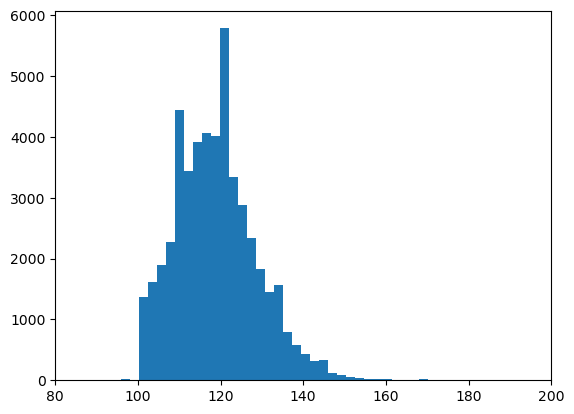

In [73]:
plt.hist(dfnna['muonparameters_n_pixels_in_ring'].values,bins=220)

#plt.yscale('log')  # Set y-axis to log scale
#plt.xlabel('Value')
#plt.ylabel('Frequency (log scale)')
#plt.title('Hist.')

plt.xlim(80.0,200)

plt.show()


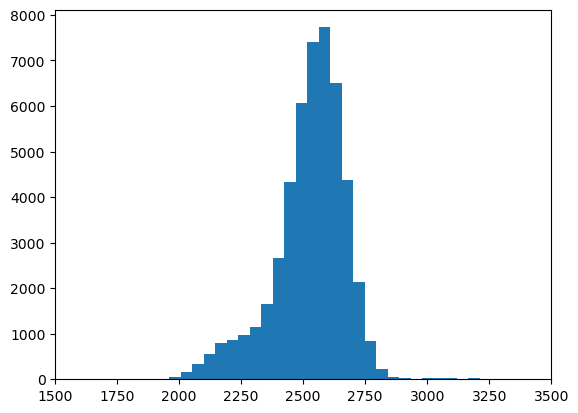

In [74]:
plt.hist(dfnna['muonparameters_ring_intensity'].values,bins=600)

#plt.yscale('log')  # Set y-axis to log scale
#plt.xlabel('Value')
#plt.ylabel('Frequency (log scale)')
#plt.title('Hist.')

plt.xlim(1500.0,3500)

plt.show()


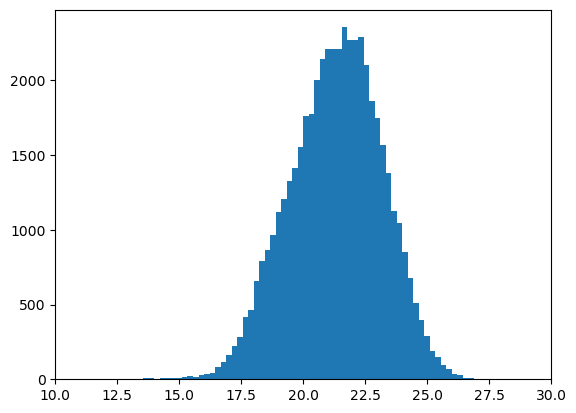

In [75]:
plt.hist(dfnna['muonparameters_ring_intensity'].values/dfnna['muonparameters_n_pixels_in_ring'].values,bins=200)

#plt.yscale('log')  # Set y-axis to log scale
#plt.xlabel('Value')
#plt.ylabel('Frequency (log scale)')
#plt.title('Hist.')

plt.xlim(10.0,30)

plt.show()


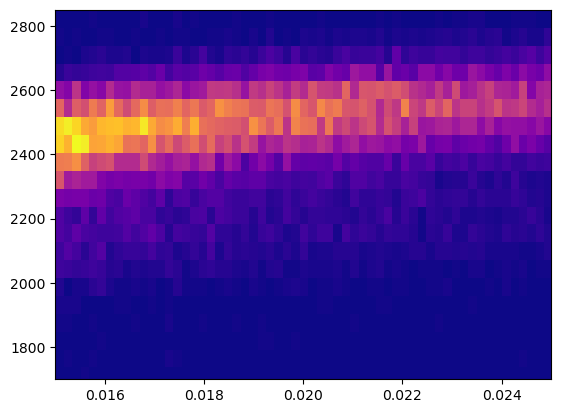

In [76]:
plt.hist2d(dfnna['true_energy'].values,
           dfnna['muonparameters_ring_intensity'].values,           
           bins=500,
           cmap='plasma')
#plt.xlabel('X axis')
#plt.ylabel('Y axis')
#plt.ylim(1,8)
#plt.title('Scatter Plot Example')
plt.ylim(1700.0,2850)
plt.xlim(0.015,0.025)


plt.show()

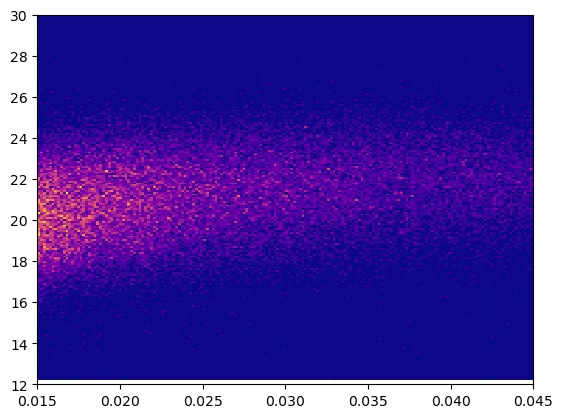

In [77]:
plt.hist2d(dfnna['true_energy'].values,
           dfnna['muonparameters_ring_intensity'].values/dfnna['muonparameters_n_pixels_in_ring'].values,           
           bins=500,
           cmap='plasma')
#plt.xlabel('X axis')
#plt.ylabel('Y axis')
#plt.ylim(1,8)
#plt.title('Scatter Plot Example')
plt.ylim(12.0,30)
plt.xlim(0.015,0.045)


plt.show()

In [78]:
dfnna_cut=dfnna[dfnna['muonefficiency_impact_delta']<2.0]

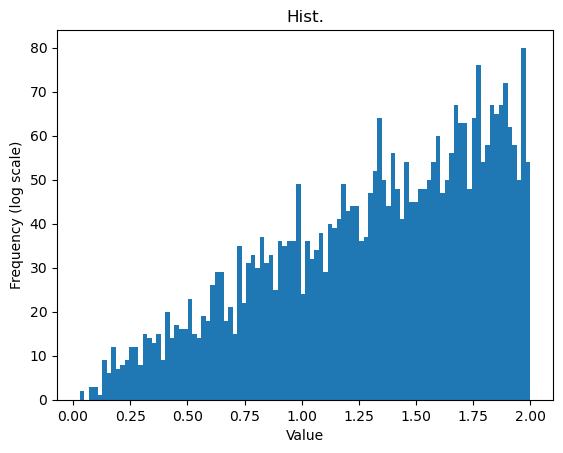

In [79]:
plt.hist(dfnna_cut['muonefficiency_impact_delta'].values,bins=100)

#plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')

#plt.xlim(-0.025,0.025)

plt.show()

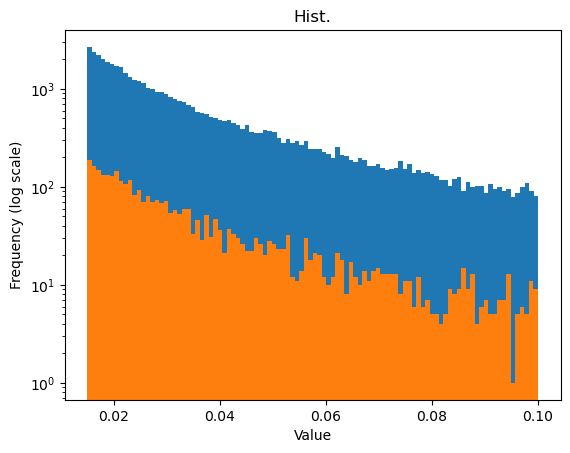

In [80]:
plt.hist(dfnna['true_energy'].values,bins=100)
plt.hist(dfnna_cut['true_energy'].values,bins=100)

plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')

#plt.xlim(-0.025,0.025)

plt.show()

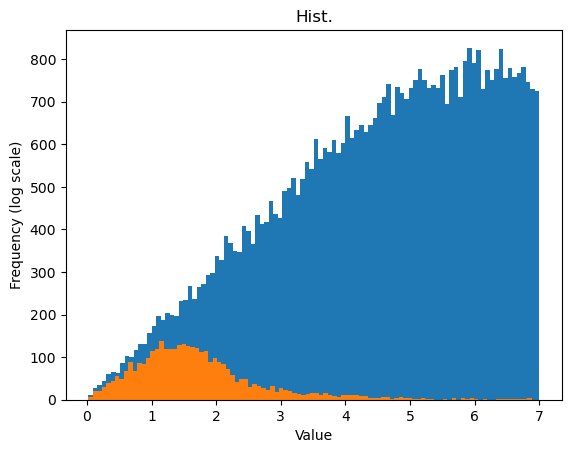

In [81]:
plt.hist(dfnna['true_core_r'].values,bins=100)
plt.hist(dfnna_cut['true_core_r'].values,bins=100)

#plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')

#plt.xlim(-0.025,0.025)

plt.show()

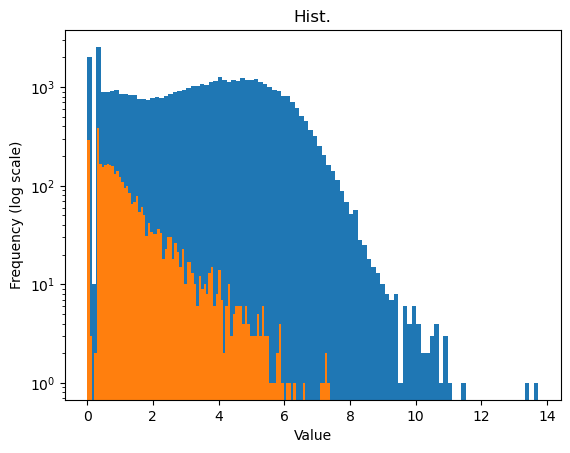

In [82]:
plt.hist(dfnna['muonefficiency_impact_r'].values,bins=100)
plt.hist(dfnna_cut['muonefficiency_impact_r'].values,bins=100)

plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')

#plt.xlim(-0.025,0.025)

plt.show()

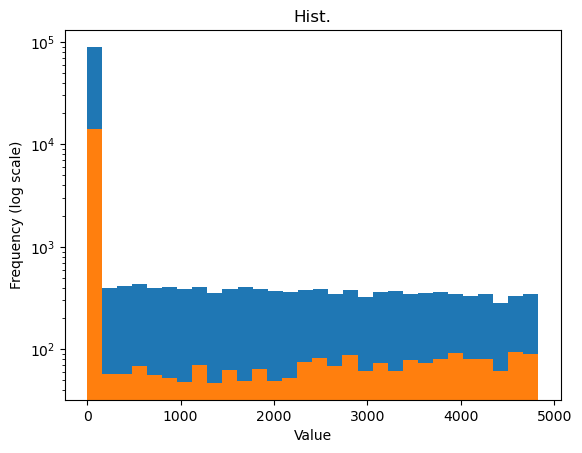

In [83]:
plt.hist(df['true_h_first_int'].values, bins=30)
plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')

plt.hist(df[df['muonefficiency_impact'].isna()]['true_h_first_int'].values, bins=30)
#plt.yscale('log')  # Set y-axis to log scale
#plt.xlabel('Value')
#plt.ylabel('Frequency (log scale)')
#plt.title('Hist.')
#plt.show()

plt.show()

In [84]:
df[df['muonefficiency_impact'].isna()]['true_h_first_int'].values

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       1.00000000e+00, 1.00000000e+00, 4.01942432e+03])

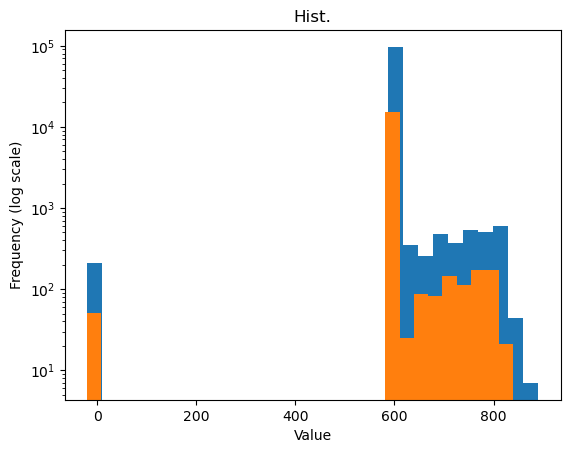

In [85]:
plt.hist(df['true_x_max'].values, bins=30)

plt.hist(df[df['muonefficiency_impact'].isna()]['true_x_max'].values, bins=30)


plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')
plt.show()

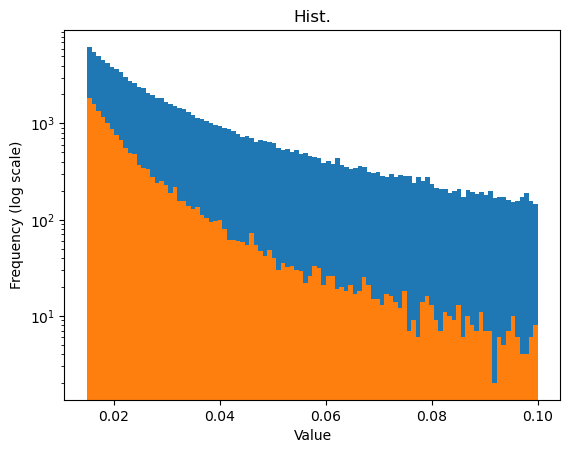

In [86]:
plt.hist(df['true_energy'].values, bins=100)

plt.hist(df[df['muonefficiency_impact'].isna()]['true_energy'].values, bins=100)


plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')
plt.show()

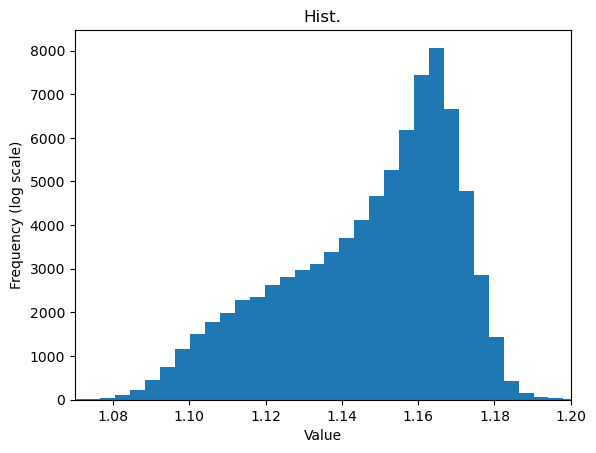

In [87]:
plt.hist(df[~df['muonring_radius'].isna()]['muonring_radius'].values, bins=1000)

#plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')

plt.xlim(1.07,1.2)

plt.show()

In [88]:
df['true_gamma'] = df['true_energy'].apply(lambda x: (x+0.0001056583755)/0.0001056583755)

In [89]:
df['true_betta'] = df['true_gamma'].apply(lambda x: np.sqrt(1.0 - 1.0/x/x))

In [90]:
df['expected_muonring_radius'] = df['true_betta'].apply(lambda x: np.acos(1.0/x/1.00021)*180.0/np.pi)

<Axes: >

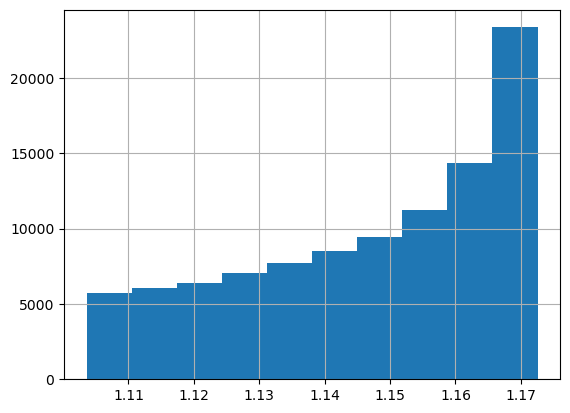

In [91]:
df['expected_muonring_radius'].hist()

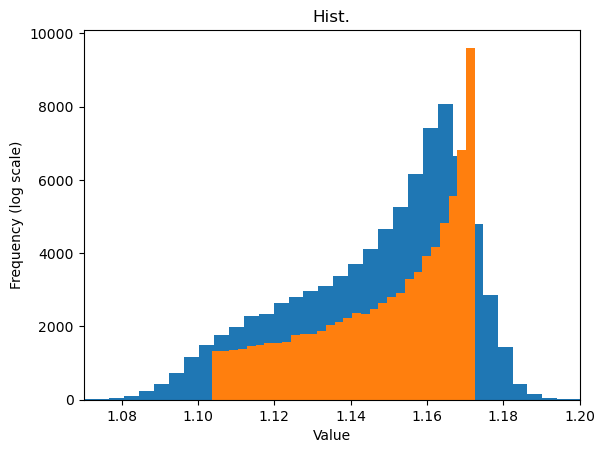

In [92]:
plt.hist(df[~df['muonring_radius'].isna()]['muonring_radius'].values, bins=1000)
plt.hist(df[~df['muonring_radius'].isna()]['expected_muonring_radius'].values, bins=30)

#plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')

plt.xlim(1.07,1.2)

plt.show()

In [93]:
dfc=df[df['true_energy']>0.07]

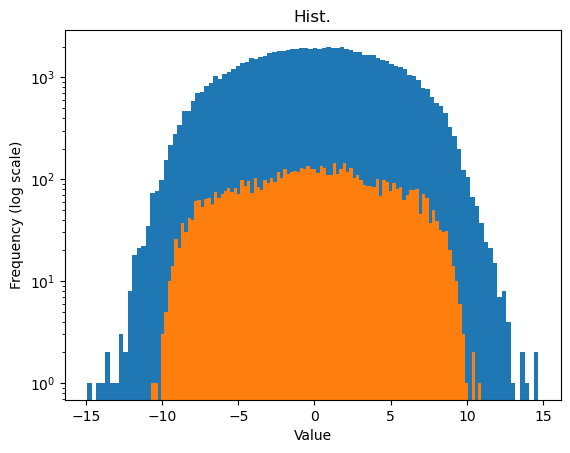

In [94]:
plt.hist(df[~df['muonefficiency_impact_x'].isna()]['muonefficiency_impact_x'].values - df[~df['muonefficiency_impact_x'].isna()]['true_core_x'].values,
         bins=100)

plt.hist(dfc[~dfc['muonefficiency_impact_x'].isna()]['muonefficiency_impact_x'].values - dfc[~dfc['muonefficiency_impact_x'].isna()]['true_core_x'].values,
         bins=100)


plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')

#plt.xlim(-0.025,0.025)

plt.show()

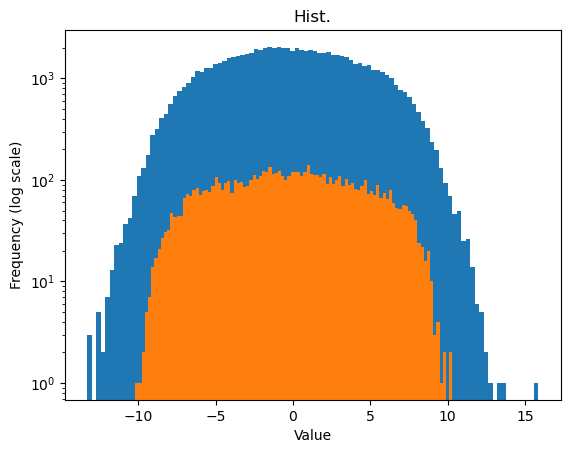

In [95]:
plt.hist(df[~df['muonefficiency_impact_y'].isna()]['muonefficiency_impact_y'].values - df[~df['muonefficiency_impact_y'].isna()]['true_core_y'].values,
         bins=100)

plt.hist(dfc[~dfc['muonefficiency_impact_y'].isna()]['muonefficiency_impact_y'].values - dfc[~dfc['muonefficiency_impact_y'].isna()]['true_core_y'].values,
         bins=100)


plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')

#plt.xlim(-0.025,0.025)

plt.show()

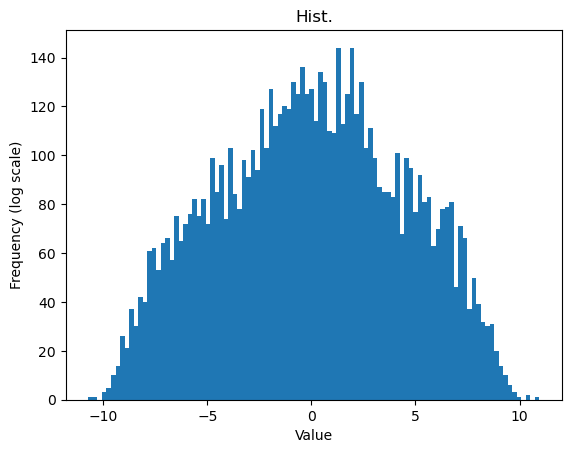

In [96]:
plt.hist(dfc[~dfc['muonefficiency_impact_x'].isna()]['muonefficiency_impact_x'].values - dfc[~dfc['muonefficiency_impact_x'].isna()]['true_core_x'].values,
         bins=100)


#plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')

#plt.xlim(-0.025,0.025)

plt.show()

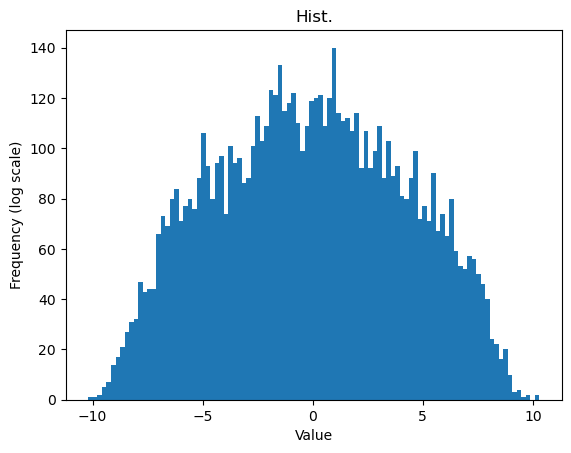

In [97]:
plt.hist(dfc[~dfc['muonefficiency_impact_y'].isna()]['muonefficiency_impact_y'].values - dfc[~dfc['muonefficiency_impact_y'].isna()]['true_core_y'].values,
         bins=100)


#plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')

#plt.xlim(-0.025,0.025)

plt.show()

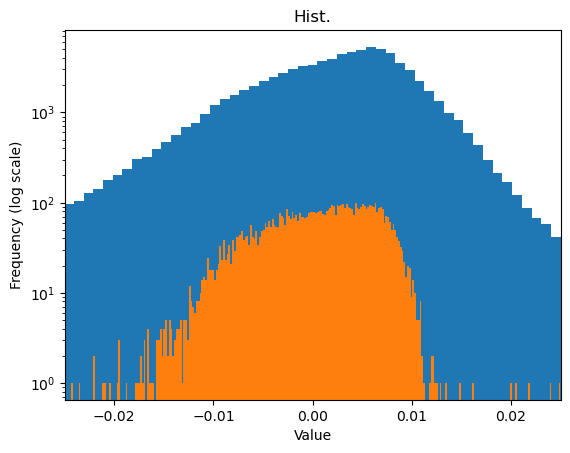

In [98]:
plt.hist(-df[~df['muonring_radius'].isna()]['muonring_radius'].values + df[~df['muonring_radius'].isna()]['expected_muonring_radius'].values,
         bins=4000)

plt.hist(-dfc[~dfc['muonring_radius'].isna()]['muonring_radius'].values + dfc[~dfc['muonring_radius'].isna()]['expected_muonring_radius'].values,
         bins=4000)


plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')

plt.xlim(-0.025,0.025)

plt.show()

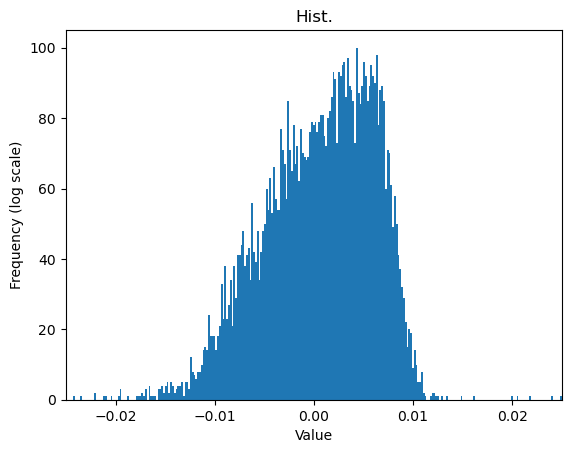

In [99]:
plt.hist(-dfc[~dfc['muonring_radius'].isna()]['muonring_radius'].values + dfc[~dfc['muonring_radius'].isna()]['expected_muonring_radius'].values,
         bins=4000)


#plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')

plt.xlim(-0.025,0.025)

plt.show()

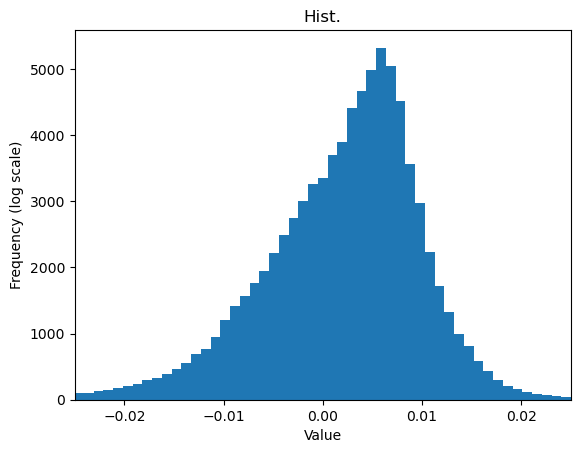

In [100]:
plt.hist(-df[~df['muonring_radius'].isna()]['muonring_radius'].values + df[~df['muonring_radius'].isna()]['expected_muonring_radius'].values,
         bins=4000)

#plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Hist.')

plt.xlim(-0.025,0.025)

plt.show()

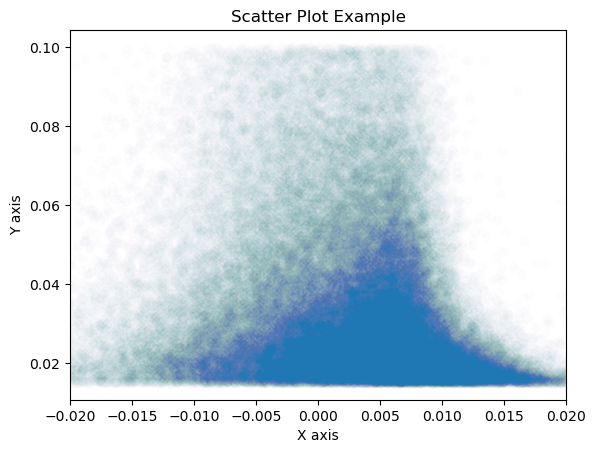

In [101]:
plt.scatter(-df[~df['muonring_radius'].isna()]['muonring_radius'].values + df[~df['muonring_radius'].isna()]['expected_muonring_radius'].values,
            df[~df['muonring_radius'].isna()]['true_energy'].values,
            alpha=0.008)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.xlim(-0.02,0.02)
plt.title('Scatter Plot Example')
plt.show()

In [102]:
from ctapipe.visualization import CameraDisplay

In [103]:
subarr=SubarrayDescription.read(
        "dataset://gamma_prod5.simtel.zst",
        focal_length_choice="EQUIVALENT")

In [104]:
#SST-1M DigiCam (corsika_theta_20.0_az_180.0_run10.simtel.gz)
#geom = subarr.tel[4].camera.geometry
#optics = subarr.tel[4].optics

#Mace (corsika_theta_20.0_az_180.0_run10.simtel.gz)
#geom = subarr.tel[1].camera.geometry
#optics = subarr.tel[1].optics


#LST LSTCam
geom = subarr.tel[1].camera.geometry
optics = subarr.tel[1].optics
#MST FlashCam
#geom = subarr.tel[5].camera.geometry
#optics = subarr.tel[5].optics
#MST NectarCam
#geom = subarr.tel[100].camera.geometry
#optics = subarr.tel[100].optics
#SST CHEC
#geom = subarr.tel[60].camera.geometry
#optics = subarr.tel[60].optics

#geom = subarr.tel[50].camera.geometry

#geom = subarr.tel[8].camera.geometry
#def prod5_mst_flashcam(subarray_prod5_paranal):
#    return subarray_prod5_paranal.tel[5]
#def prod5_mst_nectarcam(subarray_prod5_paranal):
#    return subarray_prod5_paranal.tel[100]
#def prod5_lst(subarray_prod5_paranal):
#    return subarray_prod5_paranal.tel[1]
#def prod5_sst(subarray_prod5_paranal):
#    return subarray_prod5_paranal.tel[60]

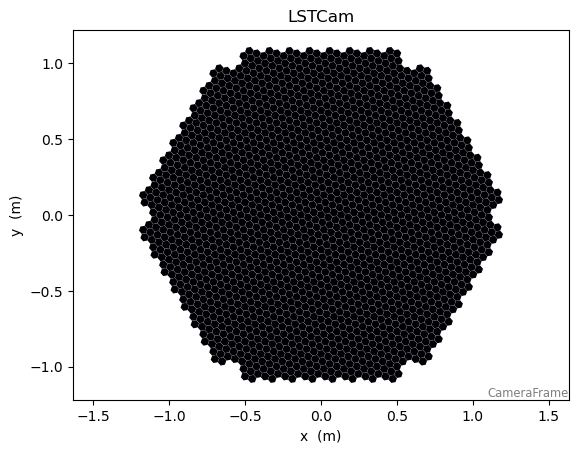

In [105]:
disp = CameraDisplay(geom)

In [106]:
h5file_list[0].root.dl1.event.telescope.images.tel_001

/dl1/event/telescope/images/tel_001 (Table(np.int64(9989),)fletcher32, shuffle, blosc:zstd(5)) np.str_('Storage of TelEventIndexContainer,DL1CameraContainer')
  description := {
  "obs_id": Int32Col(shape=(), dflt=np.int32(0), pos=0),
  "event_id": Int64Col(shape=(), dflt=np.int64(0), pos=1),
  "tel_id": Int16Col(shape=(), dflt=np.int16(0), pos=2),
  "image": Float32Col(shape=(np.int64(1855),), dflt=np.float32(0.0), pos=3),
  "peak_time": Float32Col(shape=(np.int64(1855),), dflt=np.float32(0.0), pos=4),
  "image_mask": BoolCol(shape=(np.int64(1855),), dflt=np.False_, pos=5),
  "is_valid": BoolCol(shape=(), dflt=np.False_, pos=6)}
  byteorder := 'little'
  chunkshape := (np.int64(15),)

In [107]:
h5file_list[0].root.dl1.event.telescope.images.tel_001[:]['image'][0]

array([-1.4839224 ,  0.77391154, -0.921665  , ...,  5.7183986 ,
        1.8157492 ,  1.3321996 ], dtype=float32)

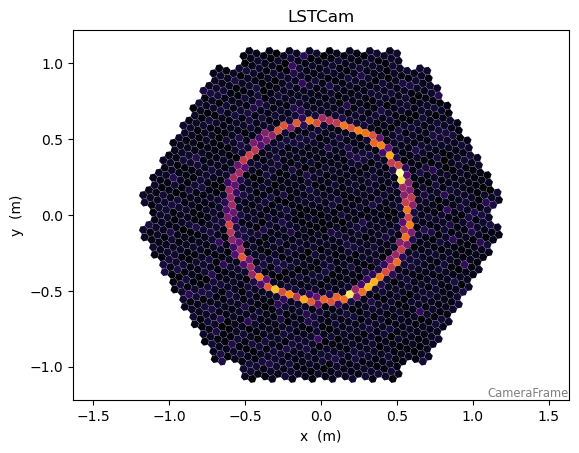

In [108]:
disp = CameraDisplay(geom,h5file_list[0].root.dl1.event.telescope.images.tel_001[:]['image'][2])

600


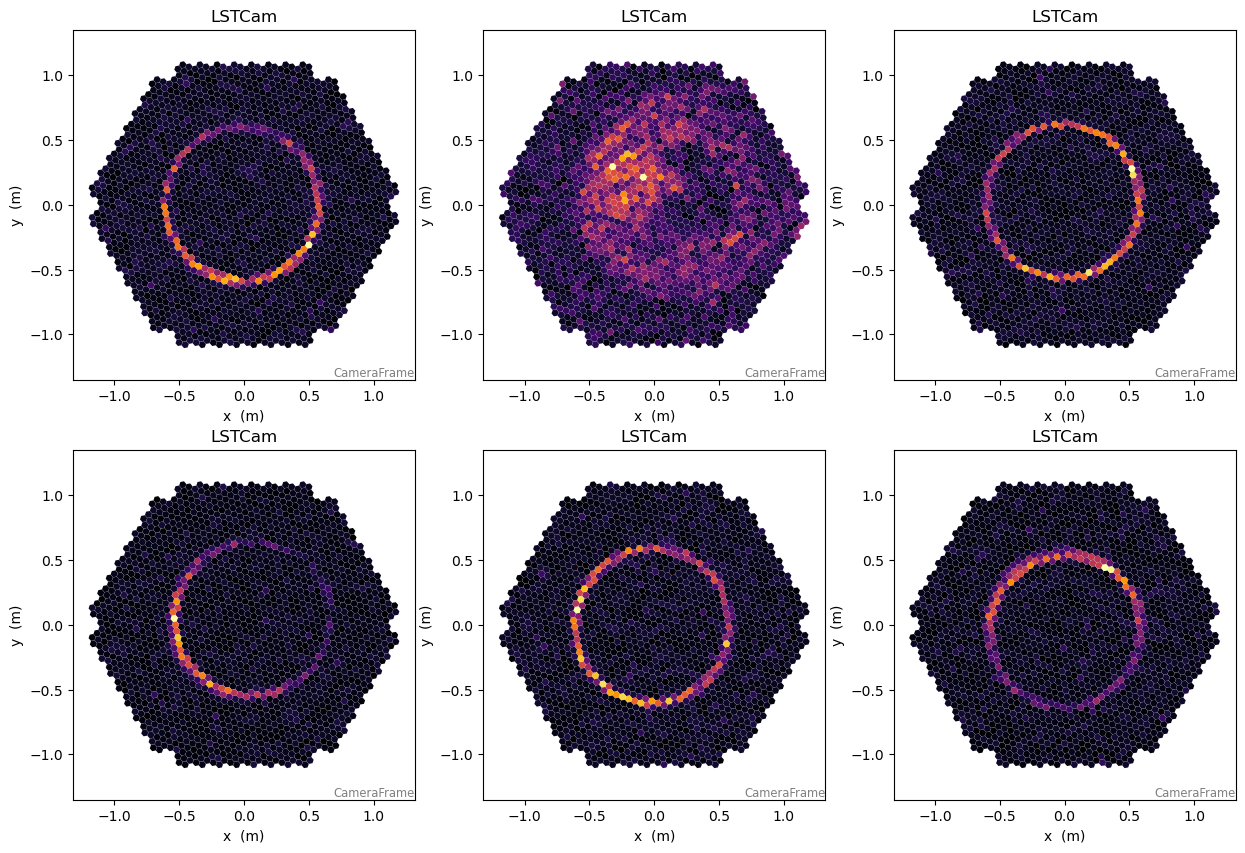

In [109]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
disp = CameraDisplay(
    geom,
    h5file_list[0].root.dl1.event.telescope.images.tel_001[:]['image'][0],
    ax=ax[0][0])
disp = CameraDisplay(
    geom,
    h5file_list[0].root.dl1.event.telescope.images.tel_001[:]['image'][1],
    ax=ax[0][1])
disp = CameraDisplay(
    geom,
    h5file_list[0].root.dl1.event.telescope.images.tel_001[:]['image'][2],
    ax=ax[0][2])
disp = CameraDisplay(
    geom,
    h5file_list[0].root.dl1.event.telescope.images.tel_001[:]['image'][3],
    ax=ax[1][0])
disp = CameraDisplay(
    geom,
    h5file_list[0].root.dl1.event.telescope.images.tel_001[:]['image'][4],
    ax=ax[1][1])
disp = CameraDisplay(
    geom,
    h5file_list[0].root.dl1.event.telescope.images.tel_001[:]['image'][5],
    ax=ax[1][2])
print(h5file_list[0].root.dl1.event.telescope.images.tel_001[:]['event_id'][5])

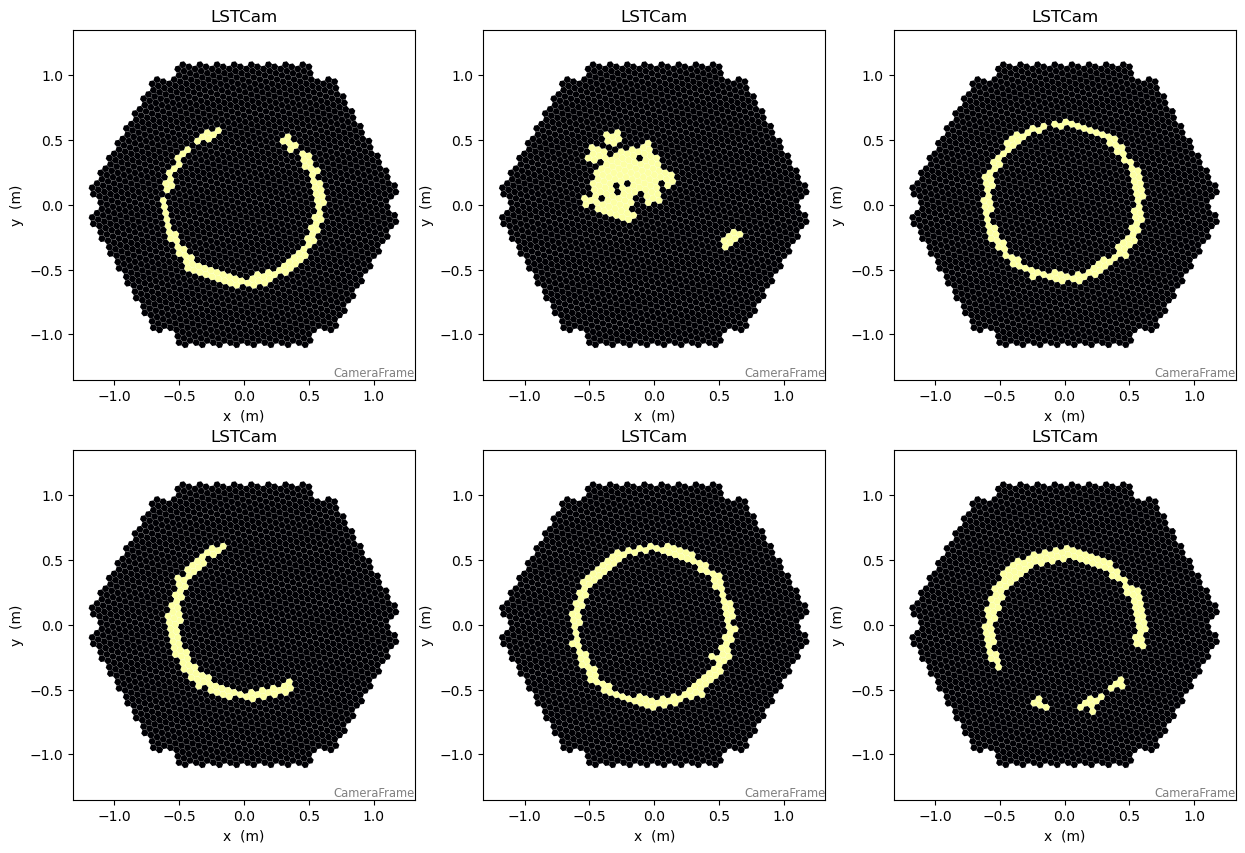

In [110]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
disp = CameraDisplay(
    geom,
    h5file_list[0].root.dl1.event.telescope.images.tel_001[:]['image_mask'][0],
    ax=ax[0][0])
disp = CameraDisplay(
    geom,
    h5file_list[0].root.dl1.event.telescope.images.tel_001[:]['image_mask'][1],
    ax=ax[0][1])
disp = CameraDisplay(
    geom,
    h5file_list[0].root.dl1.event.telescope.images.tel_001[:]['image_mask'][2],
    ax=ax[0][2])
disp = CameraDisplay(
    geom,
    h5file_list[0].root.dl1.event.telescope.images.tel_001[:]['image_mask'][3],
    ax=ax[1][0])
disp = CameraDisplay(
    geom,
    h5file_list[0].root.dl1.event.telescope.images.tel_001[:]['image_mask'][4],
    ax=ax[1][1])
disp = CameraDisplay(
    geom,
    h5file_list[0].root.dl1.event.telescope.images.tel_001[:]['image_mask'][5],
    ax=ax[1][2])

In [111]:
h5file_list[0].root.dl1.event.telescope.parameters.tel_001[:]['morphology_n_pixels']

array([102, 130, 113, ..., 103, 133, 112])

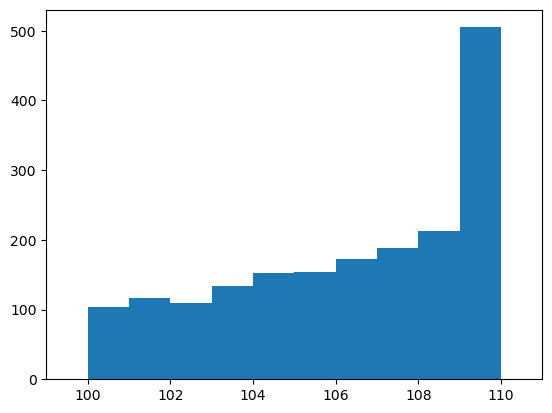

In [112]:
plt.hist(h5file_list[0].root.dl1.event.telescope.parameters.tel_001[:]['morphology_n_pixels'],
         bins=np.linspace(100.0,110.0,11))

#plt.yscale('log')  # Set y-axis to log scale
#plt.xlabel('Value')
#plt.ylabel('Frequency (log scale)')
#plt.title('Hist.')

plt.xlim(99.0,111)

plt.show()

In [113]:
np.linspace(-1.0,1.0,3)

array([-1.,  0.,  1.])

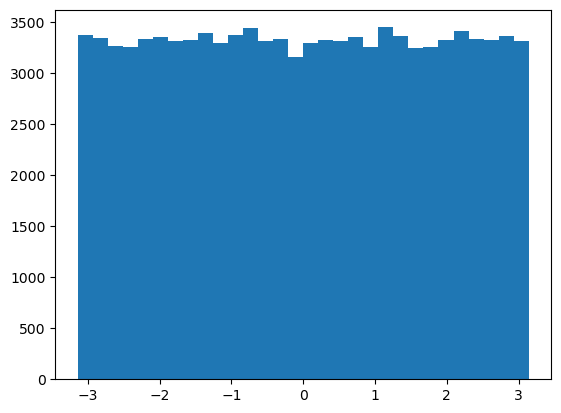

In [114]:
plt.hist(df['true_core_phi'].values,
         bins=np.linspace(-np.pi,np.pi,31))

#plt.yscale('log')  # Set y-axis to log scale
#plt.xlabel('Value')
#plt.ylabel('Frequency (log scale)')
#plt.title('Hist.')

#plt.xlim(99.0,111)

plt.show()

In [115]:
#pd.DataFrame(
#    {
#        "event_id": df['event_id'].values,
#         "x": df['true_core_x'].values,
#         "y": df['true_core_y'].values,
#    }
#).to_csv('true_core_x_y.csv', sep=" ", index=False)

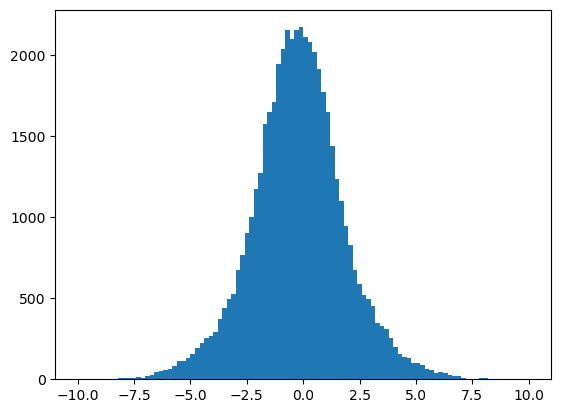

In [116]:
hist_tmp_x_res=plt.hist(dfnna['muonefficiency_impact_x_rot'].values - dfnna['true_core_x'].values,bins=np.linspace(-10.0,10.0,101))

pd.DataFrame(
    {
        'x': ((np.roll(hist_tmp_x_res[1],1)+hist_tmp_x_res[1])/2.0)[1:],
        'y': hist_tmp_x_res[0],
    }
).to_csv('tmp_hist_reco_x_m_true_x.csv', sep=" ", index=False)

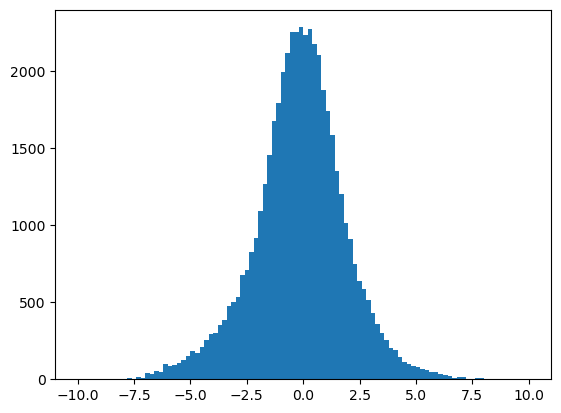

In [117]:
hist_tmp_y_res=plt.hist(dfnna['muonefficiency_impact_y_rot'].values - dfnna['true_core_y'].values,bins=np.linspace(-10.0,10.0,101))

pd.DataFrame(
    {
        'x': ((np.roll(hist_tmp_y_res[1],1)+hist_tmp_y_res[1])/2.0)[1:],
        'y': hist_tmp_y_res[0],
    }
).to_csv('tmp_hist_reco_y_m_true_y.csv', sep=" ", index=False)

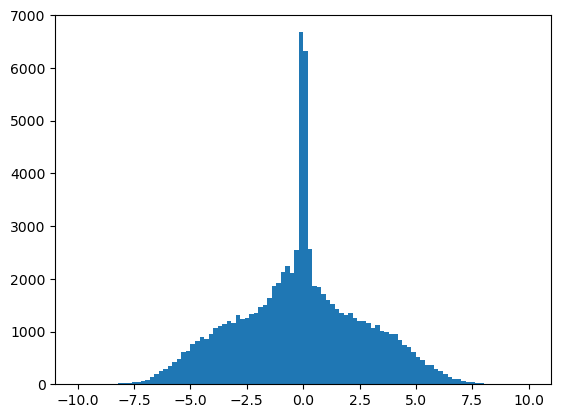

In [118]:
tmptmp02=plt.hist(df['muonefficiency_impact_x_rot'].values,bins=np.linspace(-10.0,10.0,101))

pd.DataFrame(
    {
        'x': ((np.roll(tmptmp02[1],1)+tmptmp02[1])/2.0)[1:],
        'y': tmptmp02[0],
    }
).to_csv('muonefficiency_impact_x_rot.csv', sep=" ", index=False)

In [119]:
np.sum(tmptmp02[0])

np.float64(83831.0)

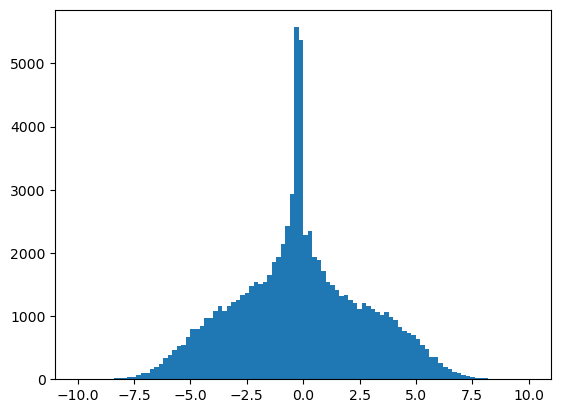

In [120]:
tmptmp02=plt.hist(df['muonefficiency_impact_y_rot'].values,bins=np.linspace(-10.0,10.0,101))

pd.DataFrame(
    {
        'x': ((np.roll(tmptmp02[1],1)+tmptmp02[1])/2.0)[1:],
        'y': tmptmp02[0],
    }
).to_csv('muonefficiency_impact_y_rot.csv', sep=" ", index=False)

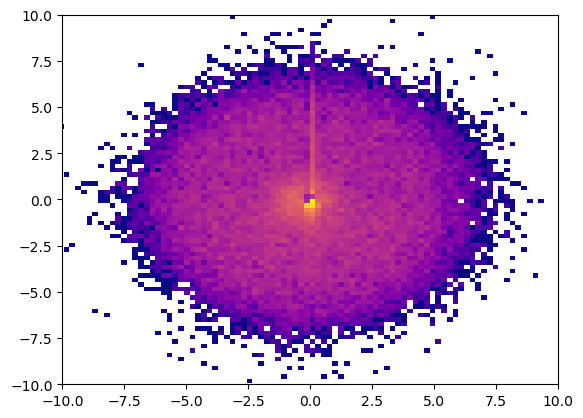

In [121]:
plt.hist2d(dfnna['muonefficiency_impact_x_rot'].values,
           dfnna['muonefficiency_impact_y_rot'].values,           
           bins=100,
           cmap='plasma',
           norm=LogNorm())
#plt.xlabel('X axis')
#plt.ylabel('Y axis')
plt.xlim(-10,10)
plt.ylim(-10,10)
#plt.title('Scatter Plot Example')
plt.show()

In [122]:
dddfff_cut=df[(df['muonefficiency_impact_y_rot']>0.2) | (df['muonefficiency_impact_y_rot']<-0.4)]
dddfff_cut=dddfff_cut[(dddfff_cut['muonefficiency_impact_x_rot']>0.2) | (dddfff_cut['muonefficiency_impact_x_rot']<-0.2)]

<Axes: >

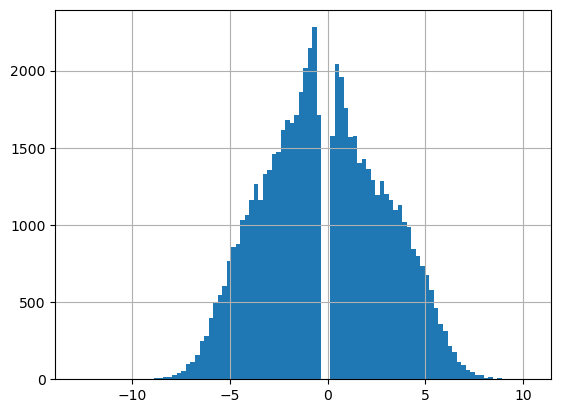

In [123]:
dddfff_cut['muonefficiency_impact_y_rot'].hist(bins=100)

In [124]:
(len(dddfff_cut)-len(df))/len(df)

-0.35681099050746984

In [125]:
df_cam_cut=df[(df['true_core_x']<1.7) & (df['true_core_x']>-1.7)]
df_cam_cut=df_cam_cut[(df_cam_cut['true_core_y']<1.7) & (df_cam_cut['true_core_y']>-1.7)]

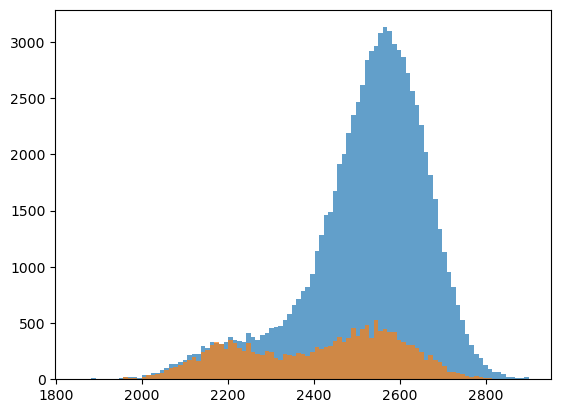

In [126]:
plt.hist(df['muonparameters_ring_intensity'].values,bins=np.linspace(1850,2900,100), alpha=0.7)

plt.hist(df_cam_cut['muonparameters_ring_intensity'].values,
         bins=np.linspace(1850,2900,100),
         weights=np.ones(len(df_cam_cut['muonparameters_ring_intensity'].values))*2.5,
         alpha=0.7,
        )

#plt.yscale('log')  # Set y-axis to log scale
#plt.xlabel('Value')
#plt.ylabel('Frequency (log scale)')
#plt.title('Hist.')

#plt.xlim(1500.0,3500)

plt.show()

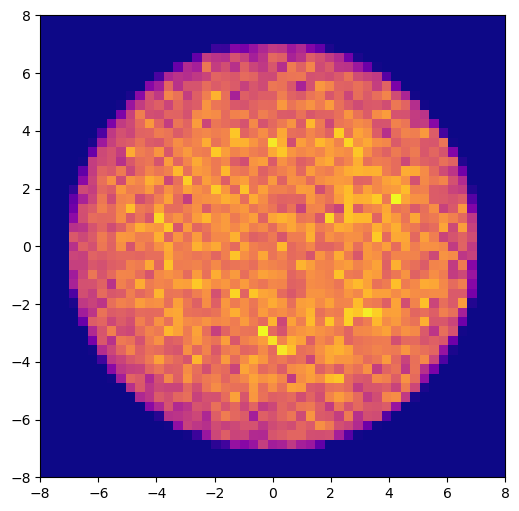

In [127]:
plt.figure(figsize=(6, 6))

hist_w = plt.hist2d(df['true_core_x'].values,
           df['true_core_y'].values,           
           bins=[
               np.linspace( -8.0, 8.0, 50), 
               np.linspace( -8.0, 8.0, 50),
           ],
           weights=np.nan_to_num(df['muonparameters_ring_intensity'].values, nan=0.0),
           cmap='plasma')

#plt.xlabel('X axis')
#plt.ylabel('Y axis')
#plt.ylim(1,8)
#plt.title('Scatter Plot Example')
plt.show()

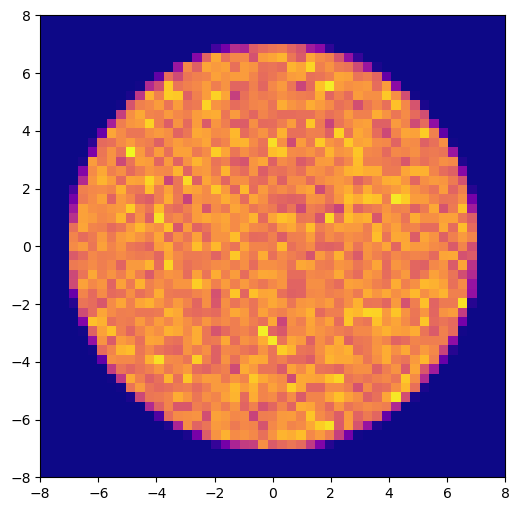

In [128]:
plt.figure(figsize=(6, 6))

hist = plt.hist2d(df['true_core_x'].values,
           df['true_core_y'].values,           
           bins=[
               np.linspace( -8.0, 8.0, 50), 
               np.linspace( -8.0, 8.0, 50),
           ],
           cmap='plasma')

#plt.xlabel('X axis')
#plt.ylabel('Y axis')
#plt.ylim(1,8)
#plt.title('Scatter Plot Example')
plt.show()

In [129]:
ratio = np.divide(hist_w[0], hist[0], out=np.zeros_like(hist_w[0], dtype=float), where=hist[0]!=0)

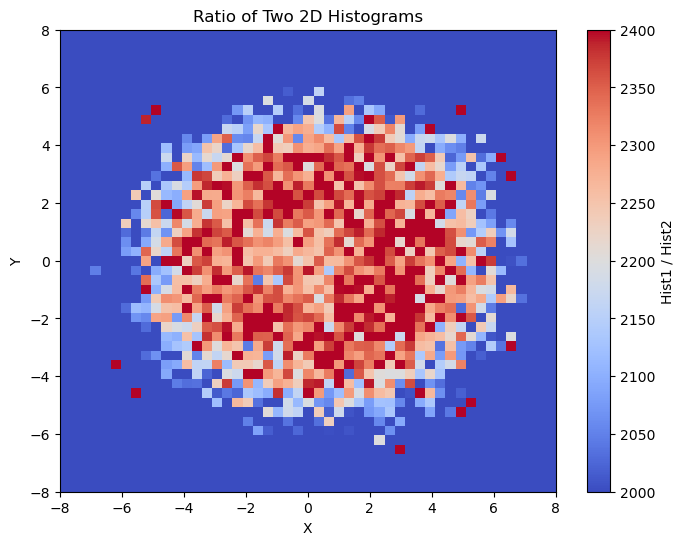

In [130]:
plt.figure(figsize=(8, 6))
plt.imshow(
    ratio.T,                     # transpose so orientation matches
    origin="lower",
    extent=[-8, 8, -8, 8],
    aspect="auto",
    cmap="coolwarm",
    vmin=2000, 
    vmax=2400
)
plt.colorbar(label="Hist1 / Hist2")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Ratio of Two 2D Histograms")
plt.show()

In [131]:
hist_w[3]

In [132]:
#plt.figure(figsize=(6, 6))
#plt.colorbar(hist_w[3])
#plt.show()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-8.        , -7.67346939, -7.34693878, -7.02040816, -6.69387755,
        -6.36734694, -6.04081633, -5.71428571, -5.3877551 , -5.06122449,
        -4.73469388, -4.40816327, -4.08163265, -3.75510204, -3.42857143,
        -3.10204082, -2.7755102 , -2.44897959, -2.12244898, -1.79591837,
        -1.46938776, -1.14285714, -0.81632653, -0.48979592, -0.16326531,
         0.16326531,  0.48979592,  0.81632653,  1.14285714,  1.46938776,
         1.79591837,  2.12244898,  2.44897959,  2.7755102 ,  3.10204082,
         3.42857143,  3.75510204,  4.08163265,  4.40816327,  4.73469388,
         5.06122449,  5.3877551 ,  5.71428571,  6.04081633,  6.36734694,
         6.69387755,  7.02040816,  7.34693878,  7.67346939,  8.        ]),
 array([-8.        

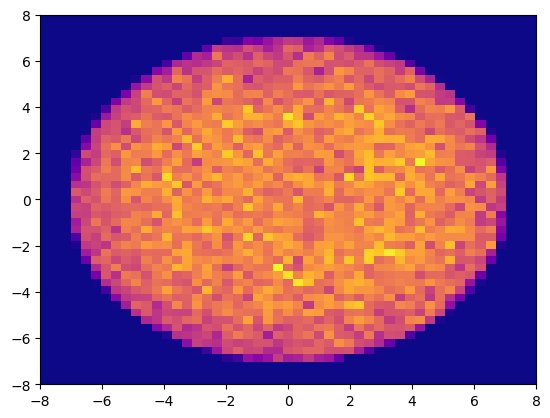

In [133]:
plt.hist2d(df['true_core_x'].values,
           df['true_core_y'].values,           
           bins=[
               np.linspace( -8.0, 8.0, 50), 
               np.linspace( -8.0, 8.0, 50),
           ],
           weights=np.nan_to_num(df['muonparameters_ring_intensity'].values, nan=0.0),
           cmap='plasma')

In [134]:
pd.DataFrame(
    {
        'e': df['true_energy'].values,
        'x': df['true_core_x'].values,
        'y': df['true_core_y'].values,
        'intensity': np.nan_to_num(df['muonparameters_ring_intensity'].values, nan=0.0),
    }
).to_csv('true_energy_core_x_y_intensity.csv', sep=" ", index=False)

In [135]:
len(df['true_core_x'].values)

99868

In [136]:
df['muonparameters_ring_intensity'].values

array([2502.01879883, 2273.85180664, 2743.55200195, ...,           nan,
       2502.95556641,           nan])

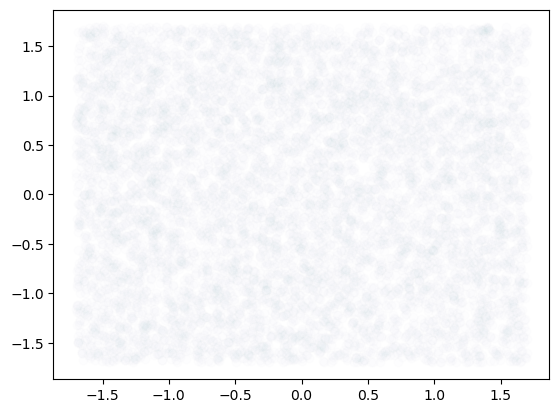

In [137]:
plt.scatter(df_cam_cut['true_core_x'].values,
            df_cam_cut['true_core_y'].values,
            alpha=0.008)
#plt.xlabel('X axis')
#plt.ylabel('Y axis')
#plt.ylim(1,8)
#plt.title('Scatter Plot Example')
plt.show()

In [138]:
optics

OpticsDescription(name=LST, size_type=LST, reflector_shape=PARABOLIC, equivalent_focal_length=28.00 m, effective_focal_length=29.31 m, n_mirrors=1, mirror_area=386.73 m2)